Caracterização meteorológica da área de estudo

Autor: Sérgio Strack e Sabrina de Melo

Nesta atividade caracterizaremos a meteorologia da área de estudo. Avaliaremos os seguintes pontos:

Meteorologia de superfície
Meteorologia upperair ou sondagem/perfil da atmosfera
Superfície - Albedo, razão de Bowen e Rugosidade
Analisaremos os dados de metar (estação meteorológica em aeroportos). Os dados serão coletados na plataforma https://hoinaski.prof.ufsc.br/BRAIN/getMETAR .
Período de estudo: 01/01/2023 a 01/01/2024.

Lugar de estudo: Mafra/SC

In [14]:
# Selecionar arquivo para análise
import os

# Pegando o caminho do diretório que estou
rootPath = os.getcwd()
print(rootPath)

# Definindo o diretório com os arquivos metar
metSuperficiePath = rootPath +'\\inputs'
print(metSuperficiePath)

# Listando os arquivos dentro do diretório
files = os.listdir(metSuperficiePath)
print(files)

i:\airpolution\scripts
i:\airpolution\scripts\inputs
['metar_2023.csv']


In [15]:
# Abrindo os arquivos metar
import pandas as pd

# Abrindo cada arquivo dentro da pasta e acumulando em uma lista chamada de metSuperficie
metSuperficie=[]
for file in files:
    metSuperficie.append(pd.read_csv(metSuperficiePath+'\\'+file))

# Convertendo metSuperficie para DataFrame
metSuperficie = pd.concat(metSuperficie)

print(metSuperficie)
print(type(metSuperficie))

      day  month  year  hour  ct     wd        ws      hc  ccp  cco  \
0       1      1  2023     0 NaN  360.0  5.144440  2133.6  3.0  3.0   
1       1      1  2023     1 NaN  360.0  4.115552  3048.0  6.0  6.0   
2       1      1  2023     2 NaN  360.0  4.115552  3048.0  6.0  6.0   
3       1      1  2023     3 NaN  350.0  4.629996  3048.0  6.0  6.0   
4       1      1  2023     4 NaN  340.0  5.144440  1219.2  6.0  6.0   
...   ...    ...   ...   ...  ..    ...       ...     ...  ...  ...   
8753   31     12  2023    19 NaN  110.0  4.629996  2438.4  6.0  6.0   
8754   31     12  2023    20 NaN  130.0  3.601108  2438.4  6.0  6.0   
8755   31     12  2023    21 NaN  120.0  2.057776  2438.4  6.0  6.0   
8756   31     12  2023    22 NaN  190.0  2.057776  2438.4  6.0  6.0   
8757   31     12  2023    23 NaN  140.0  2.057776  2438.4  6.0  6.0   

                p  temp  dpTemp  vis   pw   relh  
0     1009.658428  25.0    22.0  NaN  0.0  83.44  
1     1009.654835  25.0    22.0  NaN  0.0  83

In [16]:
# Criar uma coluna com Datetime dos dados

# Criar uma coluna de data e hora combinando as colunas separadas
metSuperficie['datetime'] = pd.to_datetime(metSuperficie[['year', 'month', 'day', 'hour']])
print(metSuperficie['datetime'])

# Definido a coluna de datetime como índice da matriz
metSuperficie.set_index(metSuperficie['datetime'])

0      2023-01-01 00:00:00
1      2023-01-01 01:00:00
2      2023-01-01 02:00:00
3      2023-01-01 03:00:00
4      2023-01-01 04:00:00
               ...        
8753   2023-12-31 19:00:00
8754   2023-12-31 20:00:00
8755   2023-12-31 21:00:00
8756   2023-12-31 22:00:00
8757   2023-12-31 23:00:00
Name: datetime, Length: 8758, dtype: datetime64[ns]


,day,month,year,hour,ct,wd,ws,hc,ccp,cco,p,temp,dpTemp,vis,pw,relh,datetime
datetime,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00,1,1,2023,0,NaN,360.0,5.144440,2133.6,3.0,3.0,1009.658428,25.0,22.0,NaN,0.0,83.44,2023-01-01 00:00:00
2023-01-01 01:00:00,1,1,2023,1,NaN,360.0,4.115552,3048.0,6.0,6.0,1009.654835,25.0,22.0,NaN,0.0,83.44,2023-01-01 01:00:00
2023-01-01 02:00:00,1,1,2023,2,NaN,360.0,4.115552,3048.0,6.0,6.0,1009.654835,25.0,22.0,NaN,0.0,83.44,2023-01-01 02:00:00
2023-01-01 03:00:00,1,1,2023,3,NaN,350.0,4.629996,3048.0,6.0,6.0,1009.654835,25.0,22.0,NaN,0.0,83.44,2023-01-01 03:00:00
2023-01-01 04:00:00,1,1,2023,4,NaN,340.0,5.144440,1219.2,6.0,6.0,1009.658428,25.0,22.0,NaN,0.0,83.44,2023-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,31,12,2023,19,NaN,110.0,4.629996,2438.4,6.0,6.0,1009.651241,25.0,18.0,NaN,0.0,65.12,2023-12-31 19:00:00
2023-12-31 20:00:00,31,12,2023,20,NaN,130.0,3.601108,2438.4,6.0,6.0,1009.651241,24.0,18.0,NaN,0.0,69.14,2023-12-31 20:00:00
2023-12-31 21:00:00,31,12,2023,21,NaN,120.0,2.057776,2438.4,6.0,6.0,1009.654835,24.0,18.0,NaN,0.0,69.14,2023-12-31 21:00:00


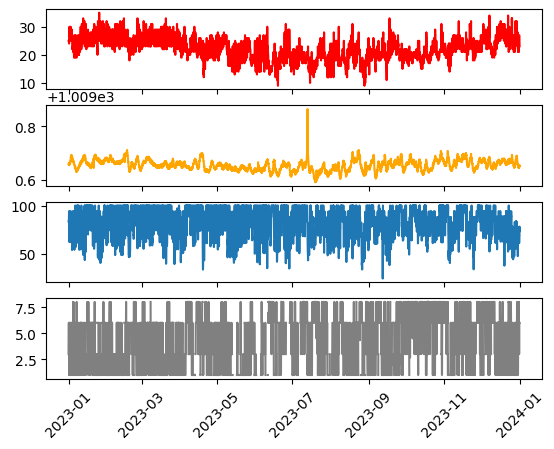

In [17]:
# Analisando os dados através de figuras
# dados brutos
import matplotlib.pyplot as plt

fig,ax = plt.subplots(4,sharex=True)
ax[0].plot(metSuperficie['datetime'],metSuperficie['temp'],color='red')
ax[1].plot(metSuperficie['datetime'],metSuperficie['p'],color='orange')
ax[2].plot(metSuperficie['datetime'],metSuperficie['relh'])
ax[3].plot(metSuperficie['datetime'],metSuperficie['cco'],color='gray')
ax[3].tick_params(axis='x', rotation=45)

i:\airpolution\scripts
i:\airpolution\scripts\inputs
['metar_2023.csv']
      day  month  year  hour  ct     wd        ws      hc  ccp  cco  \
0       1      1  2023     0 NaN  360.0  5.144440  2133.6  3.0  3.0   
1       1      1  2023     1 NaN  360.0  4.115552  3048.0  6.0  6.0   
2       1      1  2023     2 NaN  360.0  4.115552  3048.0  6.0  6.0   
3       1      1  2023     3 NaN  350.0  4.629996  3048.0  6.0  6.0   
4       1      1  2023     4 NaN  340.0  5.144440  1219.2  6.0  6.0   
...   ...    ...   ...   ...  ..    ...       ...     ...  ...  ...   
8753   31     12  2023    19 NaN  110.0  4.629996  2438.4  6.0  6.0   
8754   31     12  2023    20 NaN  130.0  3.601108  2438.4  6.0  6.0   
8755   31     12  2023    21 NaN  120.0  2.057776  2438.4  6.0  6.0   
8756   31     12  2023    22 NaN  190.0  2.057776  2438.4  6.0  6.0   
8757   31     12  2023    23 NaN  140.0  2.057776  2438.4  6.0  6.0   

                p  temp  dpTemp  vis   pw   relh  
0     1009.658428  25.0 

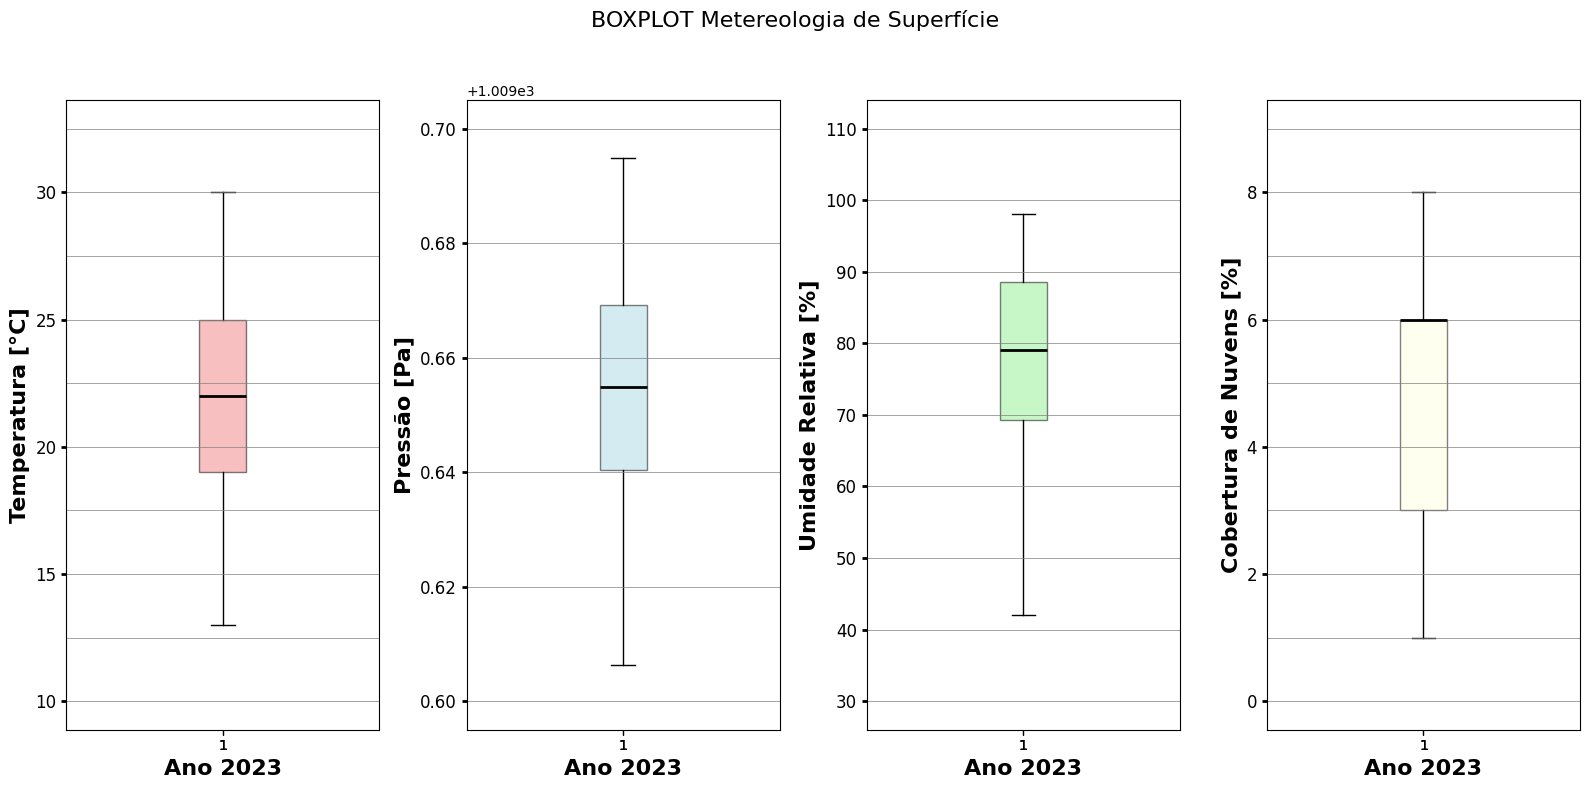

In [18]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Pegando o caminho do diretório que estou
rootPath = os.getcwd()
print(rootPath)

# Definindo o diretório com os arquivos metar
metSuperficiePath = os.path.join(rootPath, 'inputs')
print(metSuperficiePath)

# Listando os arquivos dentro do diretório
files = os.listdir(metSuperficiePath)
print(files)

# Abrindo cada arquivo dentro da pasta e acumulando em uma lista chamada de metSuperficie
metSuperficie = []
for file in files:
    metSuperficie.append(pd.read_csv(os.path.join(metSuperficiePath, file)))

# Convertendo metSuperficie para DataFrame
metSuperficie = pd.concat(metSuperficie)

print(metSuperficie)
print(type(metSuperficie))

# Criar uma coluna de data e hora combinando as colunas separadas
metSuperficie['datetime'] = pd.to_datetime(metSuperficie[['year', 'month', 'day', 'hour']])
print(metSuperficie['datetime'])

# Definido a coluna de datetime como índice da matriz
metSuperficie.set_index(metSuperficie['datetime'], inplace=True)

# Removendo valores acima do percentil 95°
temp99 = np.percentile(metSuperficie['temp'], 99)
print('O percentil 99 da temperatura é: ' + str(temp99))

p99 = np.percentile(metSuperficie['p'], 99)
print('O percentil 99 da pressão é: ' + str(p99))

relh99 = np.nanpercentile(metSuperficie['relh'], 99)
print('O percentil 99 da Umidade Relativa é: ' + str(relh99))

cco99 = np.nanpercentile(metSuperficie['cco'], 99)
print('O percentil 99 da Cobertura de Nuvens é: ' + str(cco99))

# Criando boxplot para cada variável
fig, ax = plt.subplots(1, 4, sharex=True, figsize=(16, 8))

# Adicionando título ao conjunto de subplots
fig.suptitle('BOXPLOT Metereologia de Superfície', fontsize=16)

# Ajustando espaço entre subplots
plt.subplots_adjust(wspace=0.5)

# Função para adicionar linhas de grade horizontais
def add_horizontal_gridlines(axis):
    for val in axis.get_yticks():
        axis.axhline(y=val, color='gray', linestyle='-', linewidth=0.5)

# Propriedades da linha média
medianprops = dict(linestyle='-', linewidth=2, color='black')

# Boxplot para temperatura
temp_filtered = metSuperficie['temp'][(metSuperficie['temp'] < temp99) & 
                                      (metSuperficie['temp'] > np.percentile(metSuperficie['temp'], 0.5))]
box_temp = ax[0].boxplot(temp_filtered, patch_artist=True, boxprops=dict(facecolor="lightcoral", alpha=0.5), medianprops=medianprops)
ax[0].set_xlabel('Ano 2023', fontsize=16, fontweight='bold')
ax[0].set_ylabel('Temperatura [°C]', fontsize=16, fontweight='bold')
ax[0].tick_params(axis='y', labelsize='large', width=2)  # Ajuste no tamanho das escalas
add_horizontal_gridlines(ax[0])

# Boxplot para pressão
p_filtered = metSuperficie['p'][(metSuperficie['p'] < p99) & 
                                (metSuperficie['p'] > np.percentile(metSuperficie['p'], 0.5))]
box_p = ax[1].boxplot(p_filtered, patch_artist=True, boxprops=dict(facecolor="lightblue", alpha=0.5), medianprops=medianprops)
ax[1].set_xlabel('Ano 2023', fontsize=16, fontweight='bold')
ax[1].set_ylabel('Pressão [Pa]', fontsize=16, fontweight='bold')
ax[1].tick_params(axis='y', labelsize='large', width=2)  # Ajuste no tamanho das escalas
add_horizontal_gridlines(ax[1])

# Boxplot para umidade relativa
relh_filtered = metSuperficie['relh'][(metSuperficie['relh'] < relh99) & 
                                      (metSuperficie['relh'] > np.percentile(metSuperficie['relh'], 0.5))]
box_relh = ax[2].boxplot(relh_filtered, patch_artist=True, boxprops=dict(facecolor="lightgreen", alpha=0.5), medianprops=medianprops)
ax[2].set_xlabel('Ano 2023', fontsize=16, fontweight='bold')
ax[2].set_ylabel('Umidade Relativa [%]', fontsize=16, fontweight='bold')
ax[2].tick_params(axis='y', labelsize='large', width=2)  # Ajuste no tamanho das escalas
add_horizontal_gridlines(ax[2])

# Boxplot para cobertura de nuvens (removendo valores NaN)
cco_filtered = metSuperficie['cco'][~np.isnan(metSuperficie['cco'])]
box_cco = ax[3].boxplot(cco_filtered, patch_artist=True, boxprops=dict(facecolor="lightyellow", alpha=0.5), medianprops=medianprops)
ax[3].set_xlabel('Ano 2023', fontsize=16, fontweight='bold')
ax[3].set_ylabel('Cobertura de Nuvens [%]', fontsize=16, fontweight='bold')
ax[3].tick_params(axis='y', labelsize='large', width=2)  # Ajuste no tamanho das escalas
add_horizontal_gridlines(ax[3])

# Ajustando layout para evitar sobreposição
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

                     day  month  year  hour  ct     wd        ws      hc  ccp  \
datetime                                                                        
2023-01-01 00:00:00    1      1  2023     0 NaN  360.0  5.144440  2133.6  3.0   
2023-01-01 01:00:00    1      1  2023     1 NaN  360.0  4.115552  3048.0  6.0   
2023-01-01 02:00:00    1      1  2023     2 NaN  360.0  4.115552  3048.0  6.0   
2023-01-01 03:00:00    1      1  2023     3 NaN  350.0  4.629996  3048.0  6.0   
2023-01-01 04:00:00    1      1  2023     4 NaN  340.0  5.144440  1219.2  6.0   
...                  ...    ...   ...   ...  ..    ...       ...     ...  ...   
2023-12-31 19:00:00   31     12  2023    19 NaN  110.0  4.629996  2438.4  6.0   
2023-12-31 20:00:00   31     12  2023    20 NaN  130.0  3.601108  2438.4  6.0   
2023-12-31 21:00:00   31     12  2023    21 NaN  120.0  2.057776  2438.4  6.0   
2023-12-31 22:00:00   31     12  2023    22 NaN  190.0  2.057776  2438.4  6.0   
2023-12-31 23:00:00   31    

C:\Users\Win10\AppData\Local\Temp\ipykernel_20448\2271672969.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  media_mensal = metSuperficie.resample('M').mean()
C:\Users\Win10\AppData\Local\Temp\ipykernel_20448\2271672969.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  min_mensal = metSuperficie.resample('M').min()


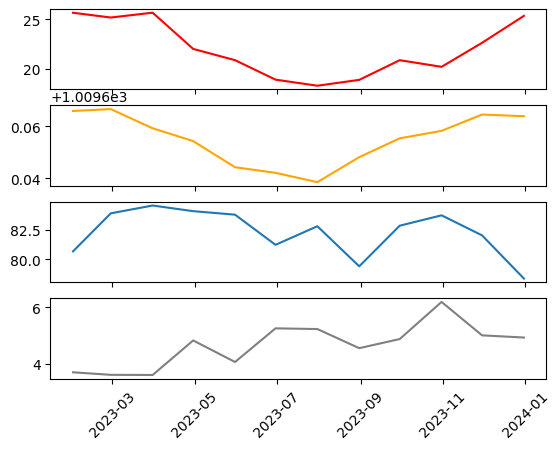

In [19]:
# Estatísticas dos dados
print(metSuperficie)
metSuperficie.set_index('datetime', inplace=True)
media_mensal = metSuperficie.resample('M').mean()
min_mensal = metSuperficie.resample('M').min()

# Plotando figura após fazer a média mensal
fig,ax = plt.subplots(4,sharex=True)
ax[0].plot(media_mensal.index,media_mensal['temp'],color='red')
ax[1].plot(media_mensal.index,media_mensal['p'],color='orange')
ax[2].plot(media_mensal.index,media_mensal['relh'])
ax[3].plot(media_mensal.index,media_mensal['cco'],color='gray')
ax[3].tick_params(axis='x', rotation=45)

print(min_mensal)

i:\airpolution\scripts
i:\airpolution\scripts\inputs
['metar_2023.csv']
      day  month  year  hour  ct     wd        ws      hc  ccp  cco  \
0       1      1  2023     0 NaN  360.0  5.144440  2133.6  3.0  3.0   
1       1      1  2023     1 NaN  360.0  4.115552  3048.0  6.0  6.0   
2       1      1  2023     2 NaN  360.0  4.115552  3048.0  6.0  6.0   
3       1      1  2023     3 NaN  350.0  4.629996  3048.0  6.0  6.0   
4       1      1  2023     4 NaN  340.0  5.144440  1219.2  6.0  6.0   
...   ...    ...   ...   ...  ..    ...       ...     ...  ...  ...   
8753   31     12  2023    19 NaN  110.0  4.629996  2438.4  6.0  6.0   
8754   31     12  2023    20 NaN  130.0  3.601108  2438.4  6.0  6.0   
8755   31     12  2023    21 NaN  120.0  2.057776  2438.4  6.0  6.0   
8756   31     12  2023    22 NaN  190.0  2.057776  2438.4  6.0  6.0   
8757   31     12  2023    23 NaN  140.0  2.057776  2438.4  6.0  6.0   

                p  temp  dpTemp  vis   pw   relh  
0     1009.658428  25.0 

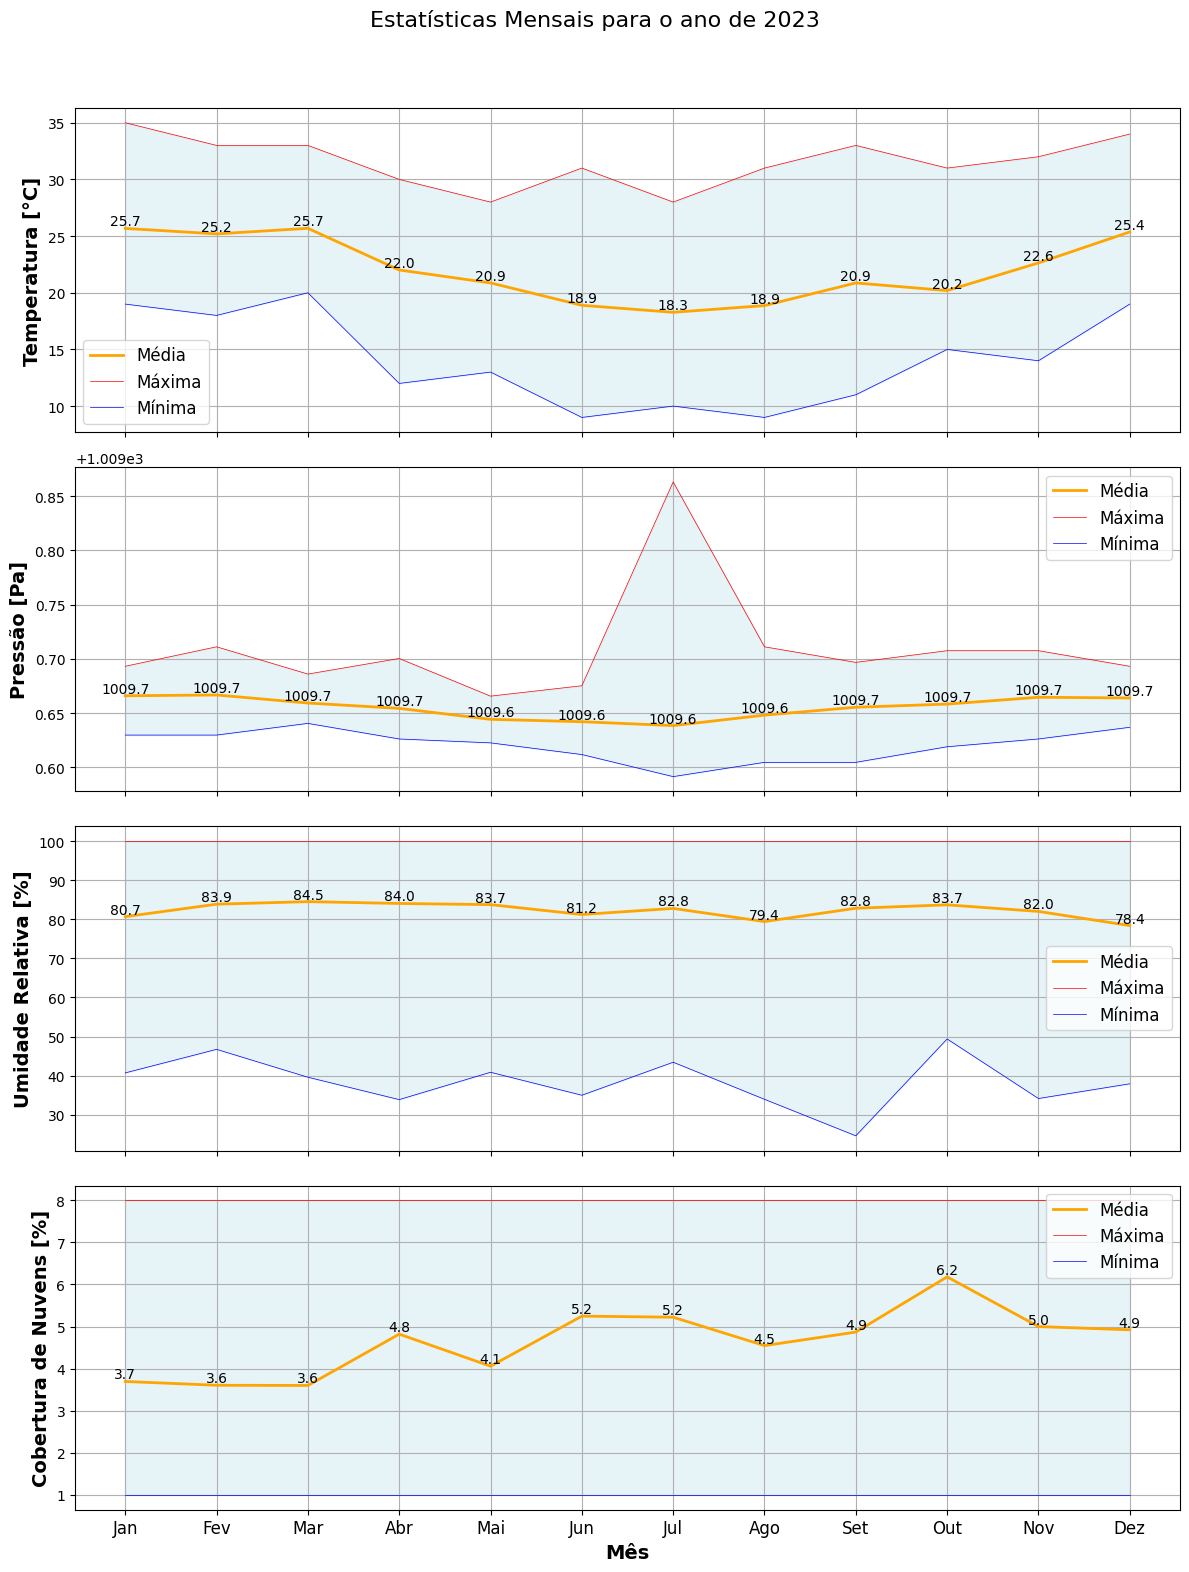

In [20]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Pegando o caminho do diretório que estou
rootPath = os.getcwd()
print(rootPath)

# Definindo o diretório com os arquivos metar
metSuperficiePath = os.path.join(rootPath, 'inputs')
print(metSuperficiePath)

# Listando os arquivos dentro do diretório
files = os.listdir(metSuperficiePath)
print(files)

# Abrindo cada arquivo dentro da pasta e acumulando em uma lista chamada de metSuperficie
metSuperficie = []
for file in files:
    metSuperficie.append(pd.read_csv(os.path.join(metSuperficiePath, file)))

# Convertendo metSuperficie para DataFrame
metSuperficie = pd.concat(metSuperficie)

print(metSuperficie)
print(type(metSuperficie))

# Criar uma coluna de data e hora combinando as colunas separadas
metSuperficie['datetime'] = pd.to_datetime(metSuperficie[['year', 'month', 'day', 'hour']])
print(metSuperficie['datetime'])

# Definido a coluna de datetime como índice da matriz
metSuperficie.set_index(metSuperficie['datetime'], inplace=True)

# Calcular a média, máxima e mínima de cada variável por mês
monthly_stats = metSuperficie.groupby('month').agg({
    'temp': ['mean', 'max', 'min'],
    'p': ['mean', 'max', 'min'],
    'relh': ['mean', 'max', 'min'],
    'cco': ['mean', 'max', 'min']
})

# Plotar as estatísticas mensais
fig, axs = plt.subplots(4, figsize=(12, 16), sharex=True)

# Definir o título do gráfico
fig.suptitle('Estatísticas Mensais para o ano de 2023', fontsize=16)

# Lista de rótulos para os eixos y
y_labels = ['Temperatura [°C]', 'Pressão [Pa]', 'Umidade Relativa [%]', 'Cobertura de Nuvens [%]']
# Lista de rótulos para os meses em português
months = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
# Cores para as variáveis
mean_color = 'orange'
min_color = 'blue'
max_color = 'red'
# Cor para a área sombreada
fill_color = 'lightblue'

# Loop através das variáveis
for i, var in enumerate(['temp', 'p', 'relh', 'cco']):
    # Plotar a média
    axs[i].plot(monthly_stats.index, monthly_stats[var]['mean'], label='Média', color=mean_color, linestyle='-', linewidth=2)
    
    # Plotar a máxima e a mínima
    axs[i].plot(monthly_stats.index, monthly_stats[var]['max'], label='Máxima', color=max_color, linestyle='-', linewidth=0.5)
    axs[i].plot(monthly_stats.index, monthly_stats[var]['min'], label='Mínima', color=min_color, linestyle='-', linewidth=0.5)

    # Adicionar valores nos pontos da média
    for j, value in enumerate(monthly_stats[var]['mean']):
        axs[i].text(j + 1, value, f"{value:.1f}", color='black', ha='center', va='bottom')
    
    # Adicionar rótulo ao eixo y
    axs[i].set_ylabel(y_labels[i], fontsize=14, fontweight='bold')
    
    # Adicionar legenda
    axs[i].legend(fontsize=12)
    
    # Plotar a área sombreada entre a mínima e a máxima
    axs[i].fill_between(monthly_stats.index, monthly_stats[var]['min'], monthly_stats[var]['max'], color=fill_color, alpha=0.3) #fill_between para mancha mínima e máxima

    # Ativar grid no gráfico
    axs[i].grid(True)

# Configurar escala do eixo x para mostrar todos os meses
axs[-1].set_xticks(range(1, 13))
axs[-1].set_xticklabels(months, fontsize=12)

# Adicionar rótulo ao eixo x
plt.xlabel('Mês', fontsize=14, fontweight='bold')

# Ajustar espaço entre os subplots
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Mostrar o gráfico
plt.show()

Informações que podemos tirar dos gráficos gerados da temperatura, umidade relativa, pressão e cobertura de nuvens:

*Temperatura:

-Tendências Sazonais: As temperaturas variam claramente entre as estações, com aumentos significativos no verão e diminuições no inverno.
-Máximas e Mínimas: No verão, as máximas atingem picos altos, e no inverno, as mínimas caem significativamente, típico de climas temperados.
-Impacto na Qualidade do Ar: No verão, altas temperaturas intensificam processos fotoquímicos, formando ozônio troposférico. No inverno, a inversão térmica pode aprisionar poluentes perto da superfície, deteriorando a qualidade do ar.

*Pressão Atmosférica:

-Tendências Sazonais: A pressão varia menos ao longo do ano, mas tende a ser mais alta no inverno e mais baixa no verão, possivelmente devido a sistemas de alta pressão mais frequentes no inverno.
-Impacto na Qualidade do Ar: Altas pressões estão associadas a condições meteorológicas mais estáveis, favorecendo a estagnação do ar e acúmulo de poluentes. Baixas pressões promovem maior dispersão de poluentes devido a condições mais instáveis.

*Umidade Relativa:

-Tendências Sazonais: A umidade é maior no verão e menor no inverno, pois o ar quente retém mais umidade.
-Impacto na Qualidade do Ar: Alta umidade pode contribuir para a formação de partículas secundárias, enquanto baixa umidade pode resultar em maior quantidade de poeira e partículas em suspensão. A umidade também afeta a dispersão de poluentes.

*Cobertura de Nuvens:

-Tendências Sazonais: A cobertura de nuvens é maior na primavera e no outono e menor no verão e inverno.
-Impacto na Qualidade do Ar: A cobertura de nuvens influencia a temperatura e a umidade. Menor cobertura no verão aumenta a radiação solar e o aquecimento da superfície, enquanto maior cobertura pode reduzir a fotólise de poluentes.

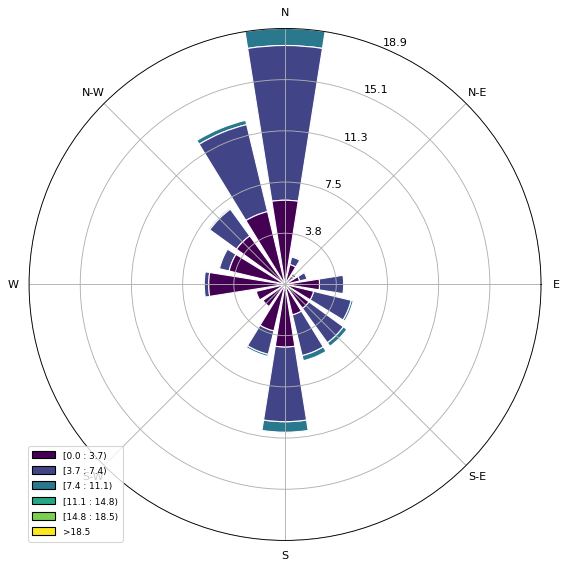

In [21]:
# Criando minha rosa dos ventos
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(metSuperficie['wd'], metSuperficie['ws'], normed=True, opening=0.8, edgecolor="white")
ax.set_legend()


Informações que podemos tirar da rosa dos ventos gerado em nosso trabalho: 

- Em Santa Catarina, a análise da rosa dos ventos revela que os ventos predominam de norte-nordeste.

- Esta direção predominante sugere que as áreas ao sul, especialmente as regiões urbanas próximas a centros industriais, podem estar mais expostas a poluentes transportados pelo vento. 

- Durante períodos de alta pressão, quando os ventos são mais fracos, observamos um aumento na concentração de CO, especialmente nas áreas com tráfego intenso.  

- Quando as temperaturas elevadas e a alta pressão podem criar condições propícias para a formação de poluentes secundários.

- No resultado da rosa dos ventos, podemos compreender melhor o comportamente do vento na região de estudo.

# Análise Perfil da Temperatura

Nesta parte vamos analisar os dados de sondagem coletados em Florianópolis utilizando a biblioteca Siphon do Python.

In [22]:
from datetime import datetime

#from metpy.units import units

from siphon.simplewebservice.wyoming import WyomingUpperAir

# Data para análise
date = datetime(2024, 1, 10, 12)
# local da análise
station = 'SBFL'

# Extraindo os dados
df = WyomingUpperAir.request_data(date, station)
print(df)

     pressure   height  temperature  dewpoint  direction  speed     u_wind  \
0      1011.0      5.0         27.8      22.8        330      6   3.000000   
1      1000.0    105.0         26.0      21.2        315      8   5.656854   
2       964.0    428.0         23.6      19.1        315     13   9.192388   
3       925.0    790.0         23.0      15.0        355     15   1.307336   
4       911.0    923.0         22.6      13.6          7     17  -2.071779   
..        ...      ...          ...       ...        ...    ...        ...   
109      19.0  26746.0        -51.3     -86.1         90     30 -30.000000   
110      17.0  27474.0        -48.7     -85.2         85     43 -42.836372   
111      16.0  27871.0        -47.3     -84.7         95     48 -47.817346   
112      15.3  28164.0        -46.3     -84.3         88     45 -44.972587   
113      15.0      NaN          NaN       NaN         85     44 -43.832567   

           v_wind station  station_number                time  

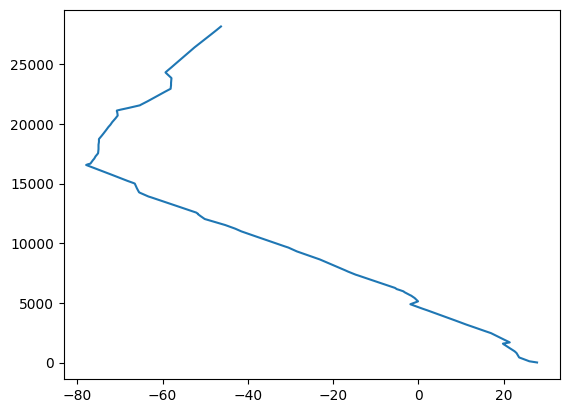

In [23]:
# Fazendo figura do perfil de temperatura
fig,ax = plt.subplots()
ax.plot(df['temperature'],df['height'])


[-1.8        -0.74303406 -0.16574586 -0.30075188 -0.35714286 -0.43613707
 -0.42857143 -0.48780488 -0.32786885  1.53846154 -0.57416268 -0.56338028
 -0.82191781 -0.80139373 -0.80701754 -0.75362319 -0.77014218 -0.81481481
 -0.7651715   0.75675676  0.70175439 -0.28409091 -0.28846154 -0.41322314
 -0.39473684 -0.66666667 -0.52830189 -0.31746032 -0.80357143 -0.86419753
 -0.40816327 -0.82969432 -0.83003953 -0.82687339 -0.82417582 -0.89285714
 -0.69498069 -0.61946903 -0.65265487 -0.79881657 -0.61919505 -0.85106383
 -0.85106383 -0.81188119 -0.81325301 -0.80378251 -0.63636364 -0.71428571
 -0.77192982 -0.9486166  -0.40160643 -0.375       0.         -0.40816327
 -0.82568807 -0.82833133 -0.8974359  -0.63492063 -0.5        -0.15060241
 -0.12626263 -0.66666667 -0.77777778 -0.71969697 -0.73200993  0.71428571
  1.05263158  0.20338983  0.24390244  0.15873016  0.23255814  0.22556391
  0.          0.02941176  0.          0.          0.04291845  0.
  0.234375    0.2247191   0.2166065   0.20833333  0.2040816

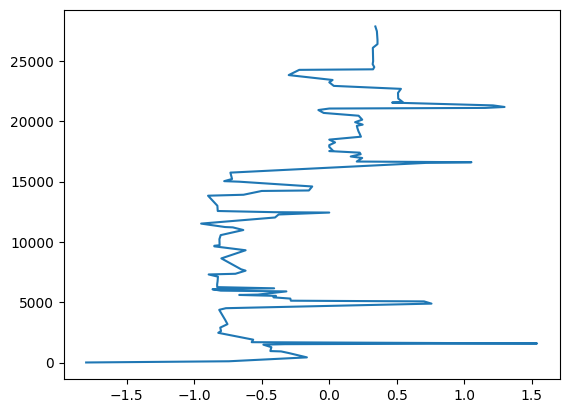

In [24]:
# Calcular gradiente de temperatura

deltaT = np.diff(df['temperature'])
deltaZ = np.diff(df['height'])

dTdZ= (deltaT/deltaZ)*100 # a cada 100 m
print(dTdZ)

fig,ax = plt.subplots()
ax.plot(dTdZ,df['height'][:-1])

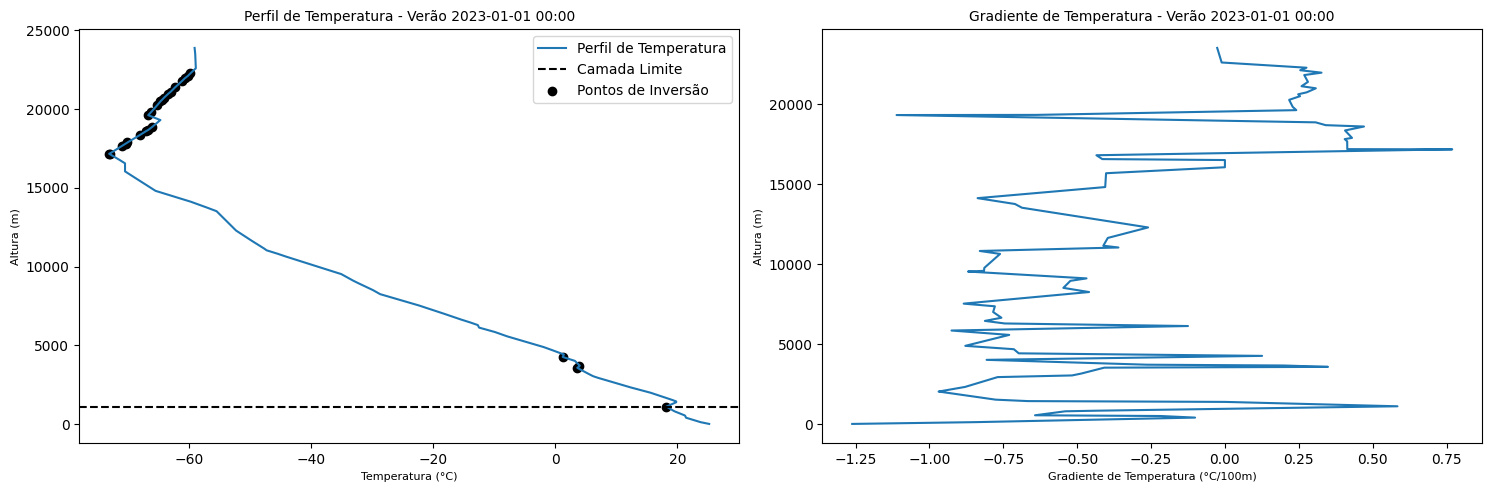

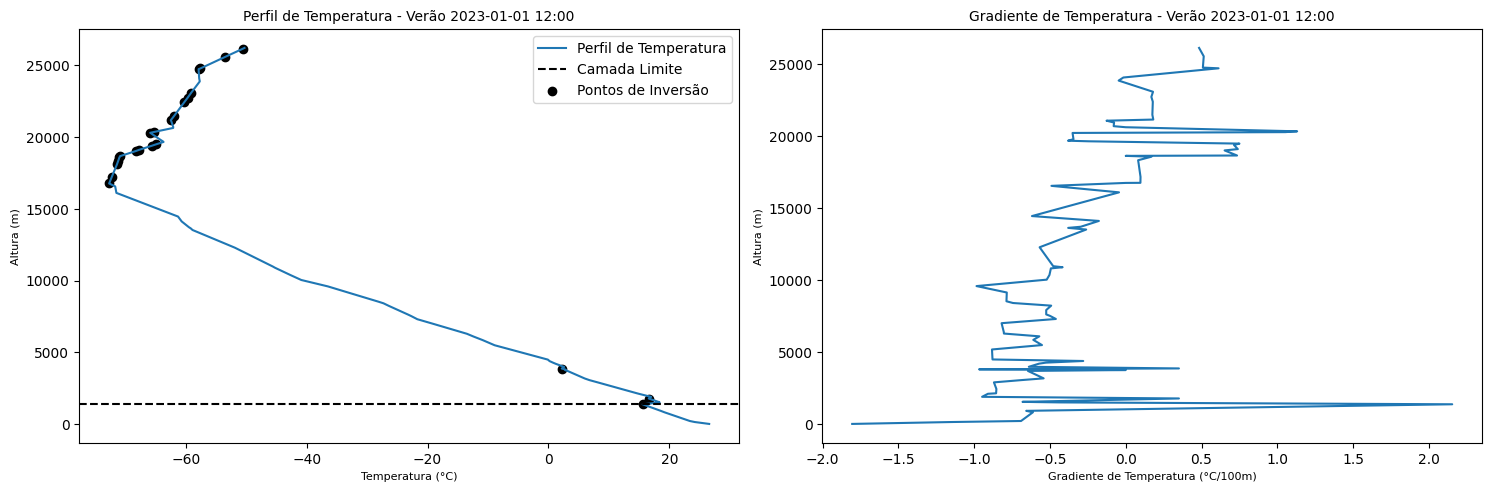

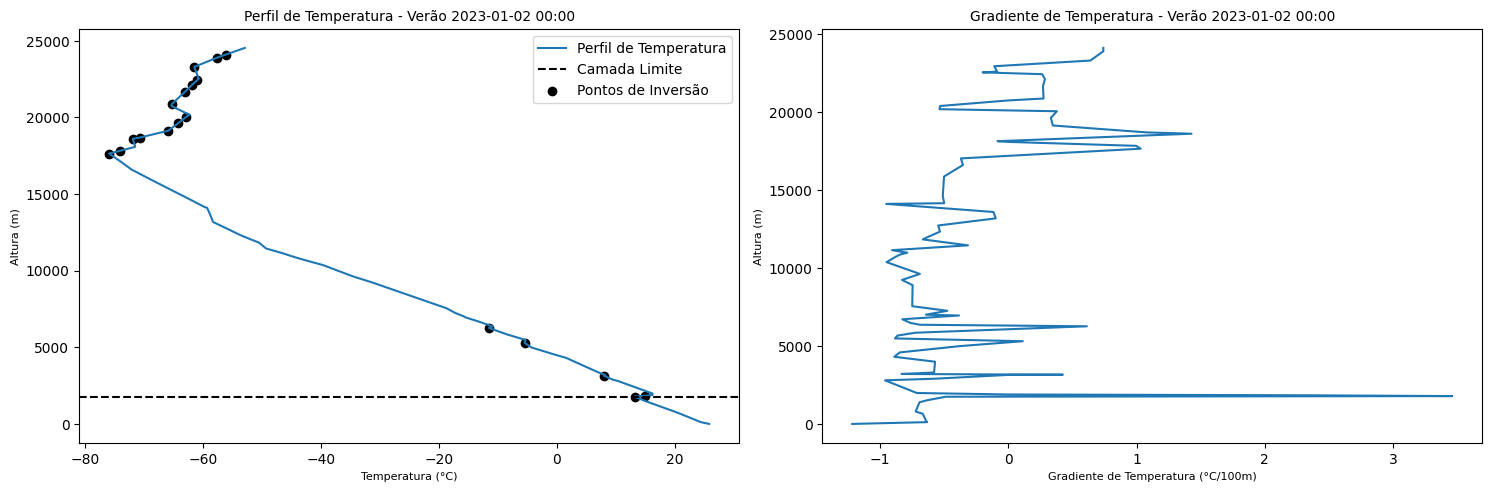

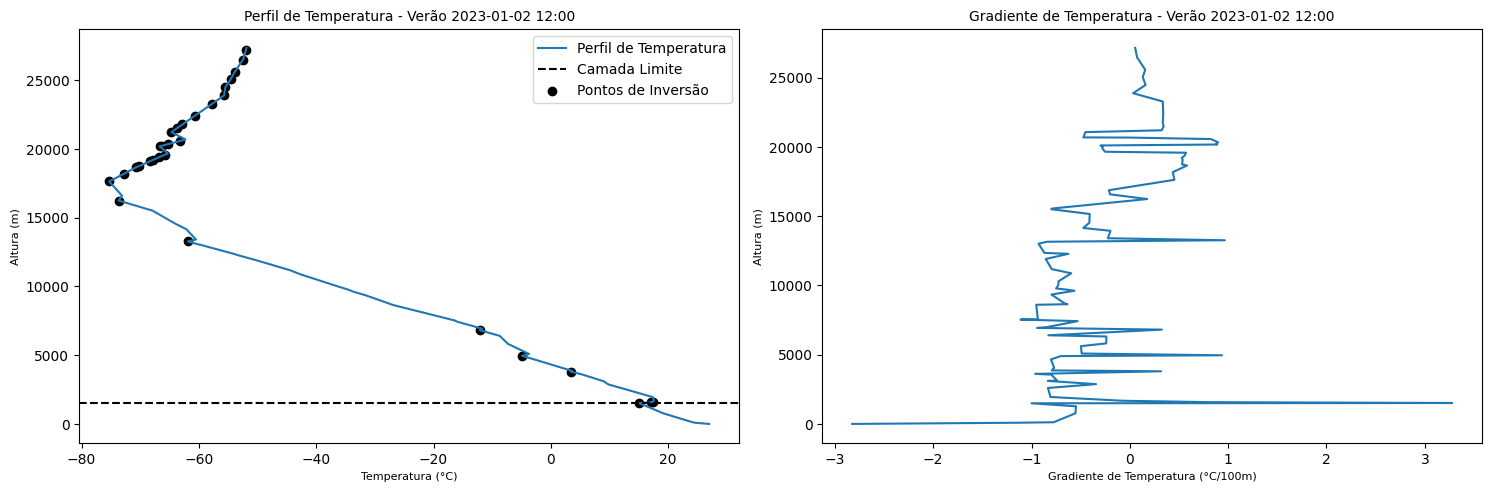

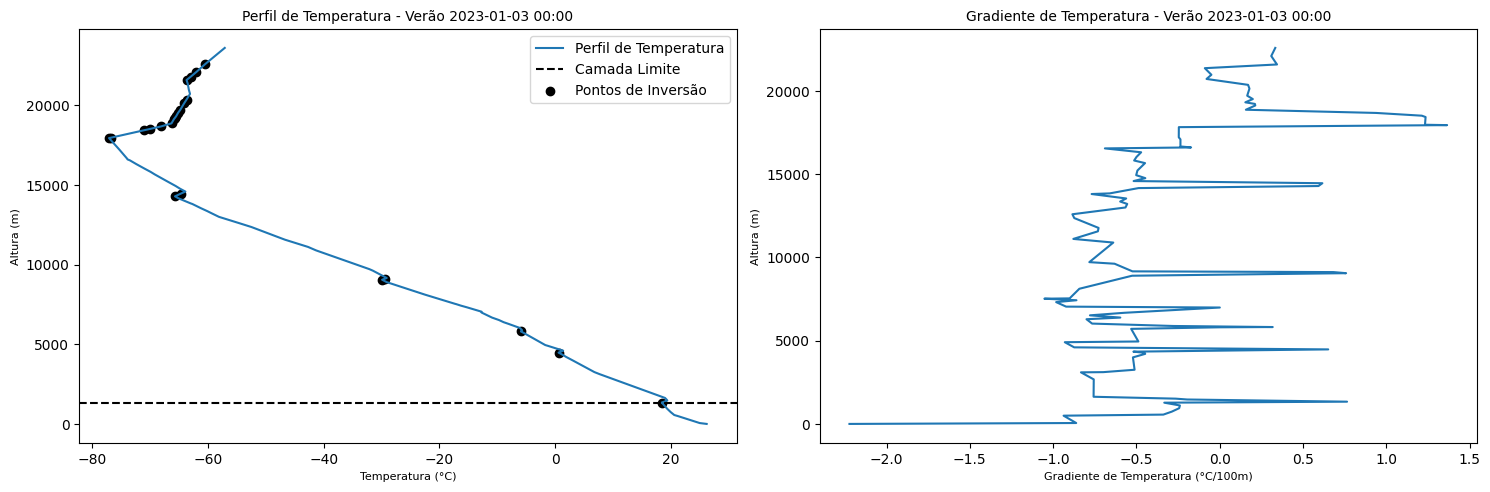

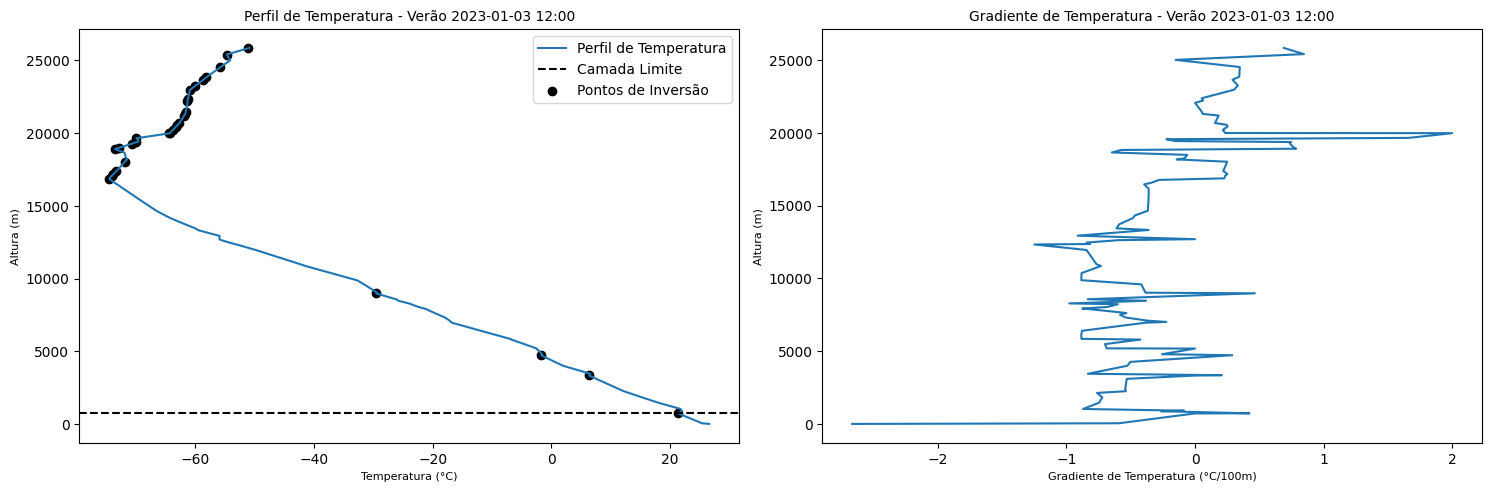

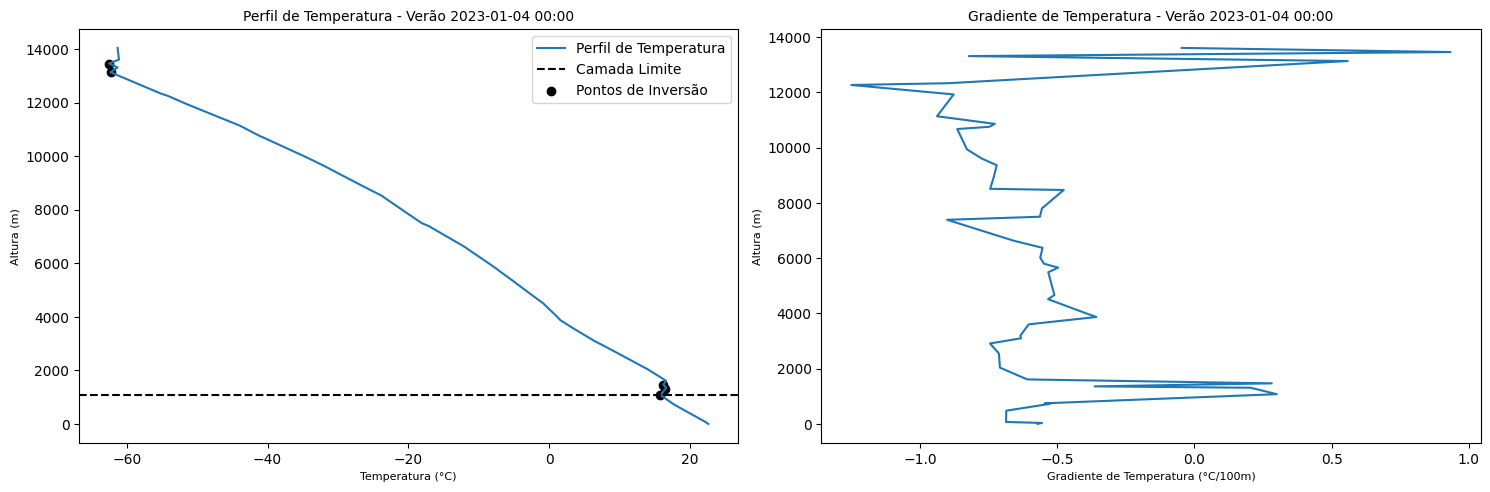

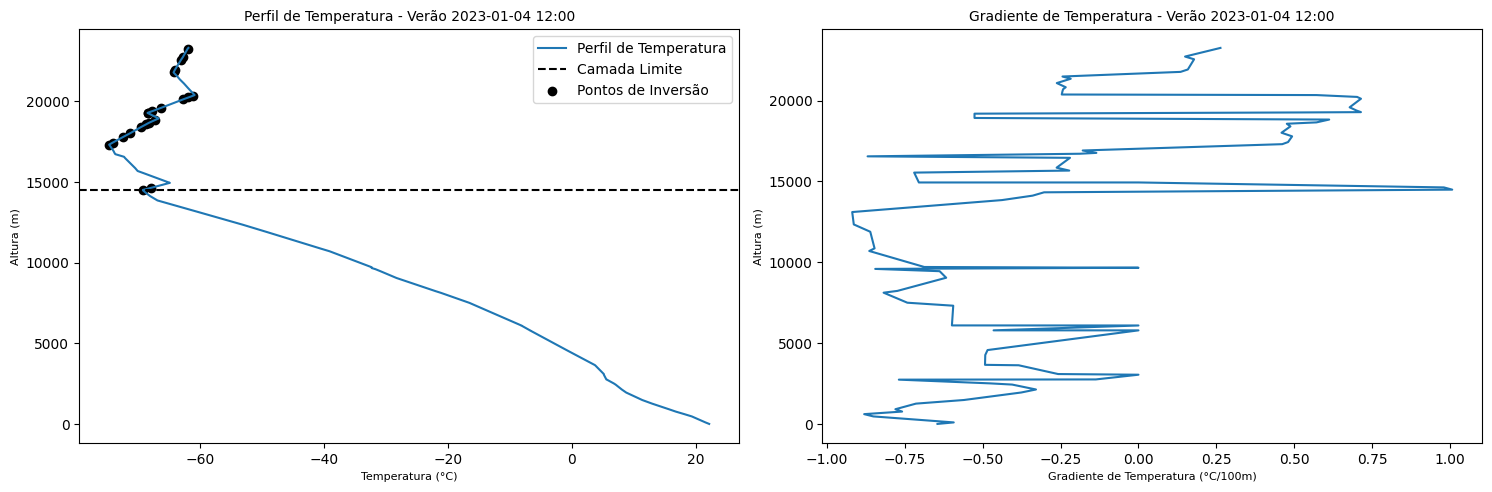

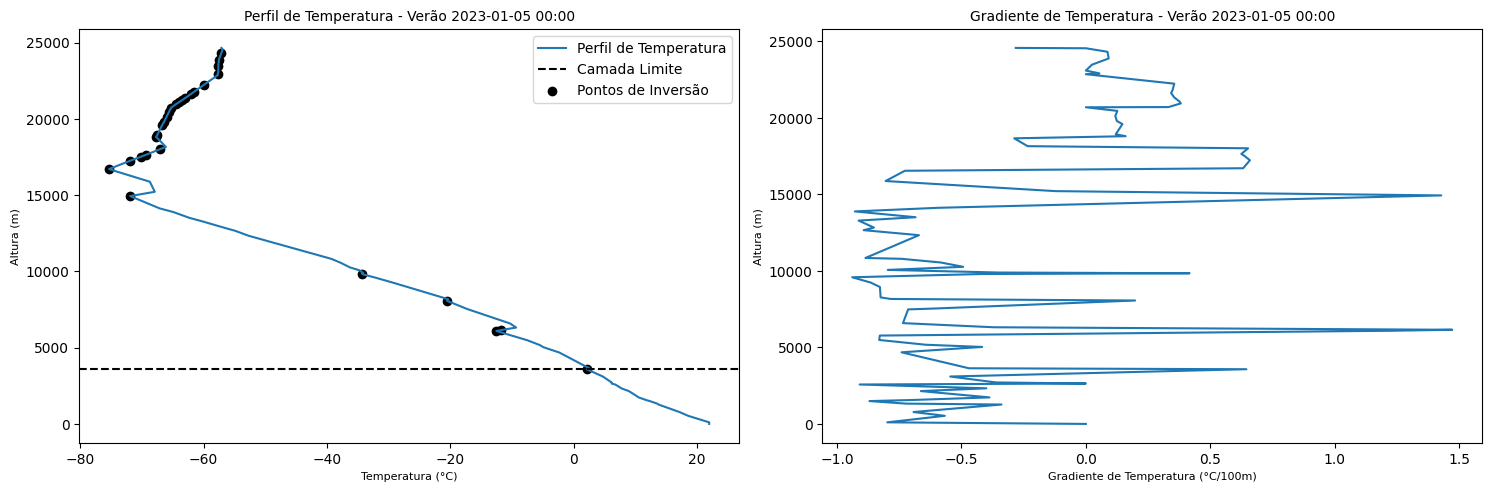

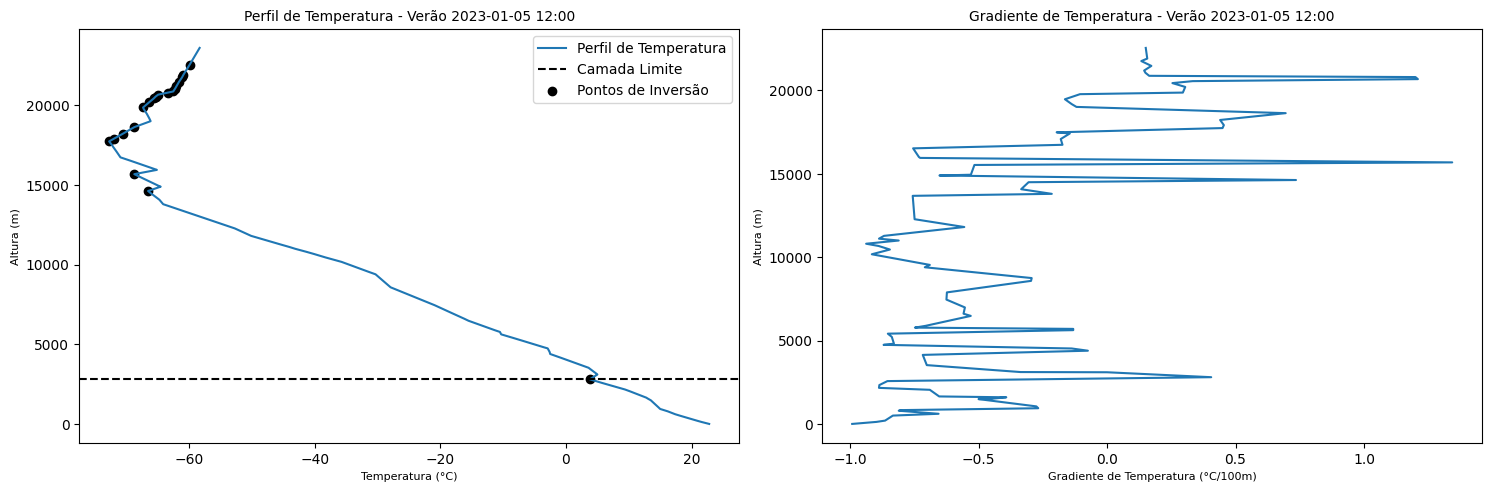

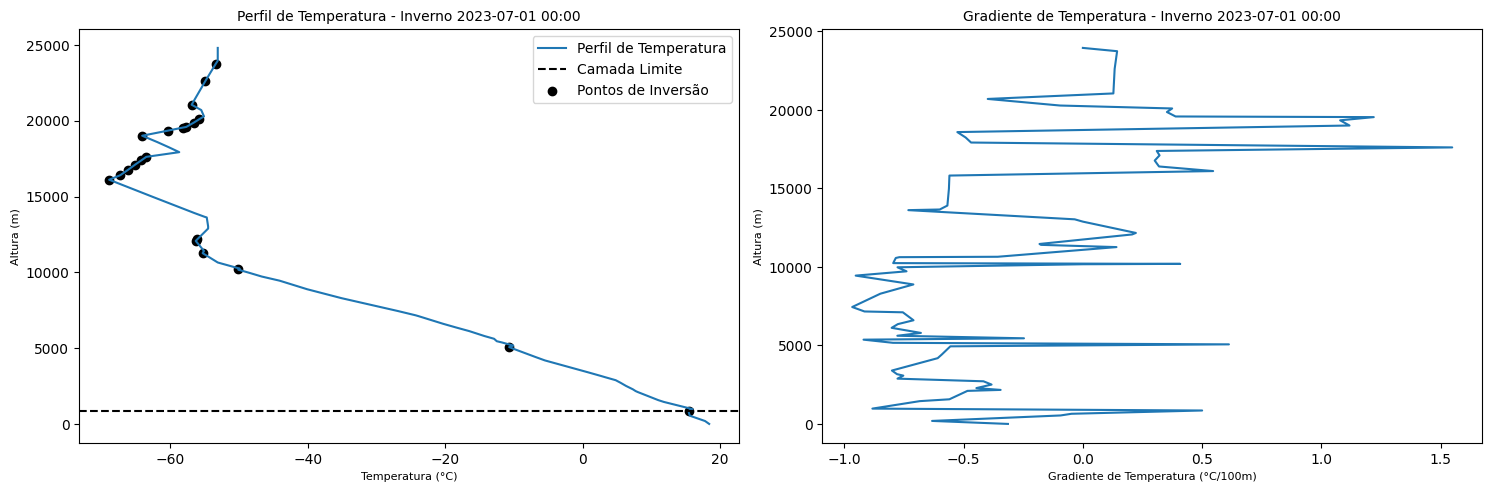

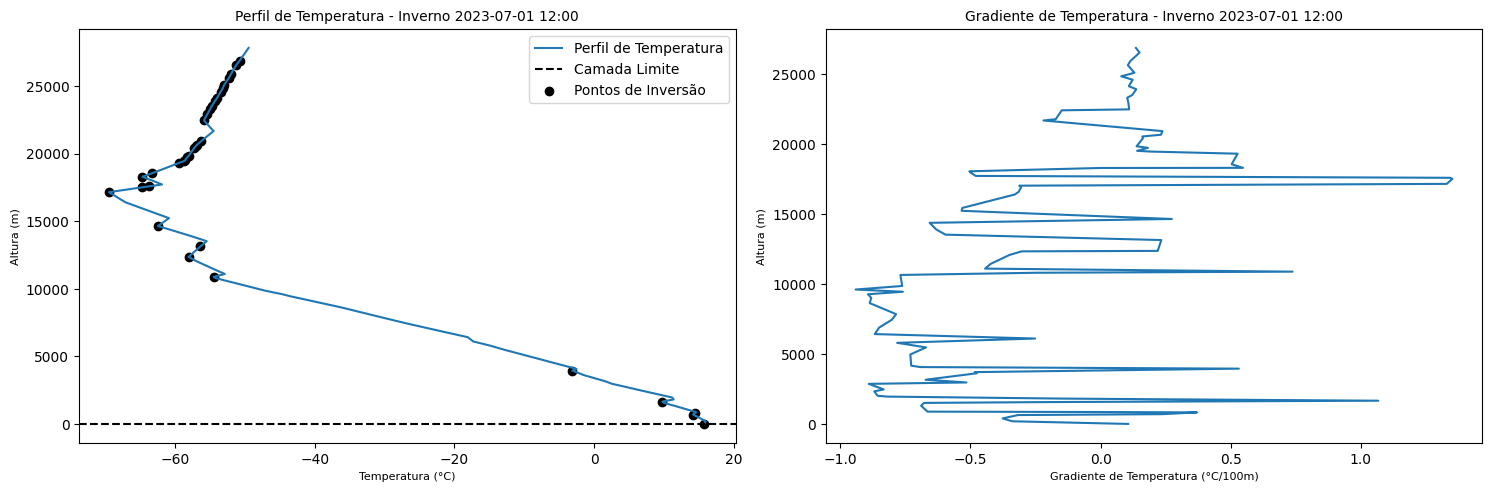

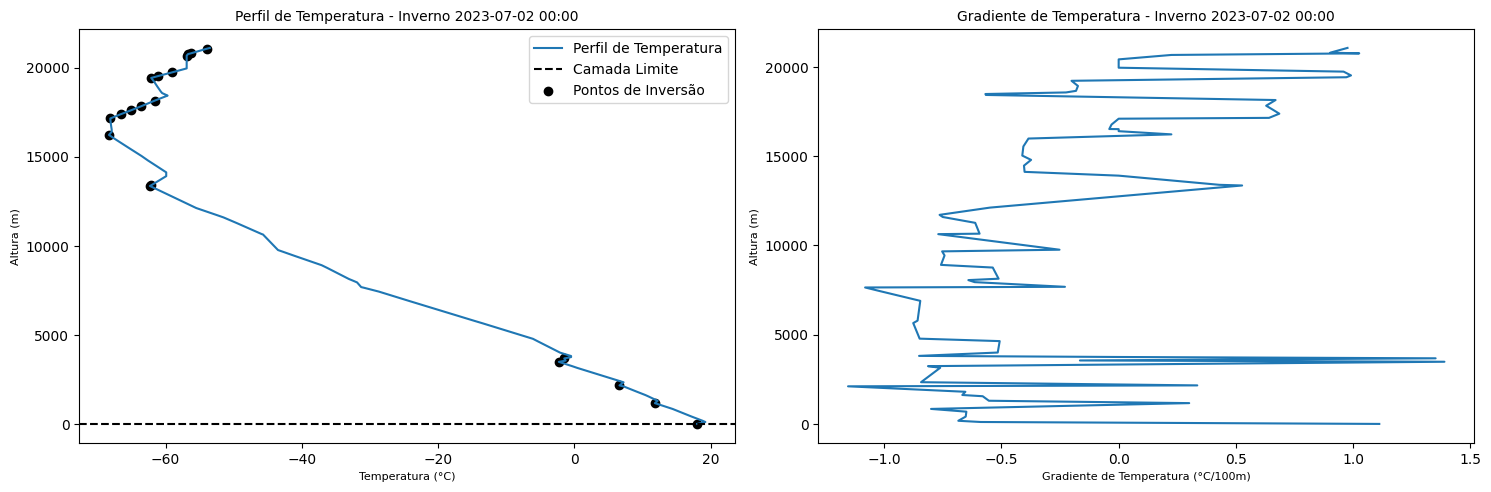

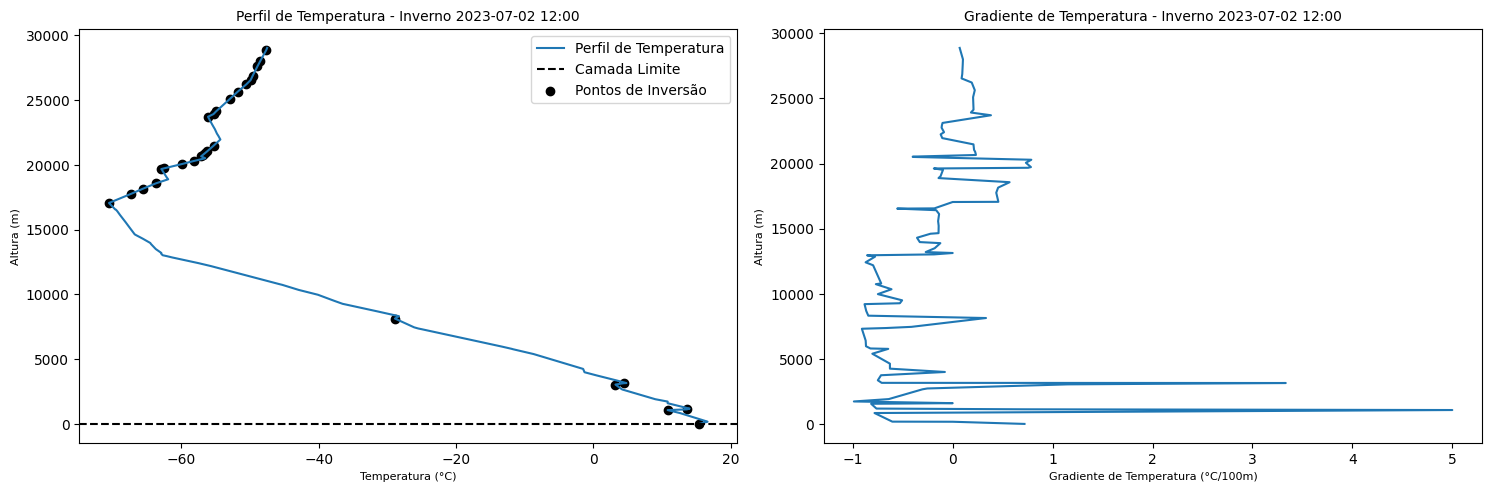

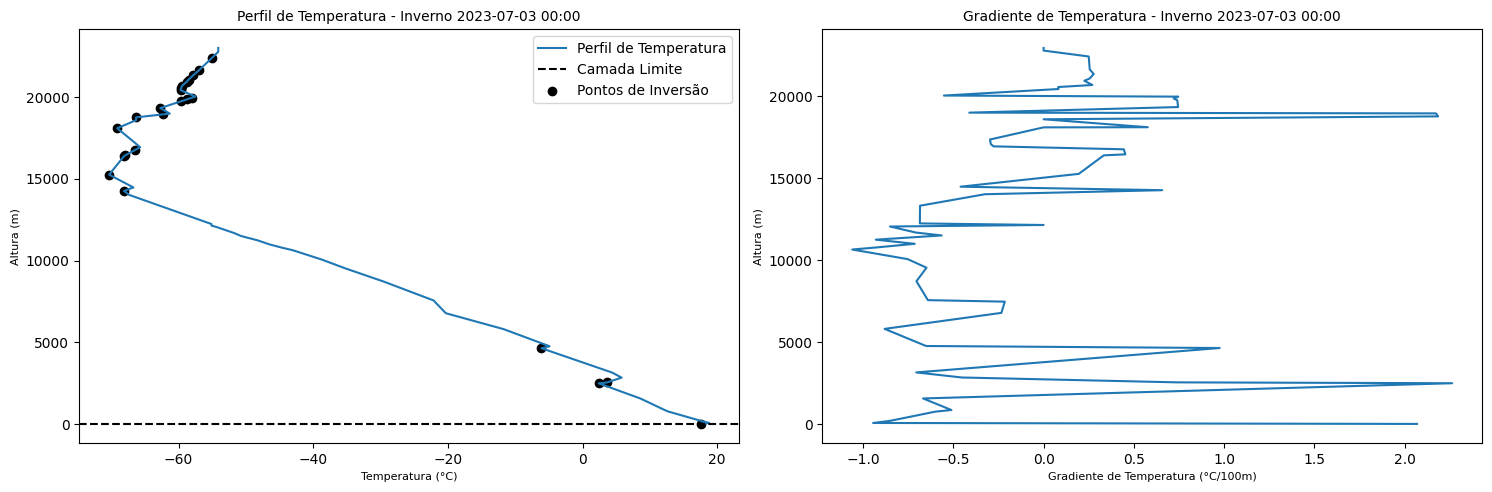

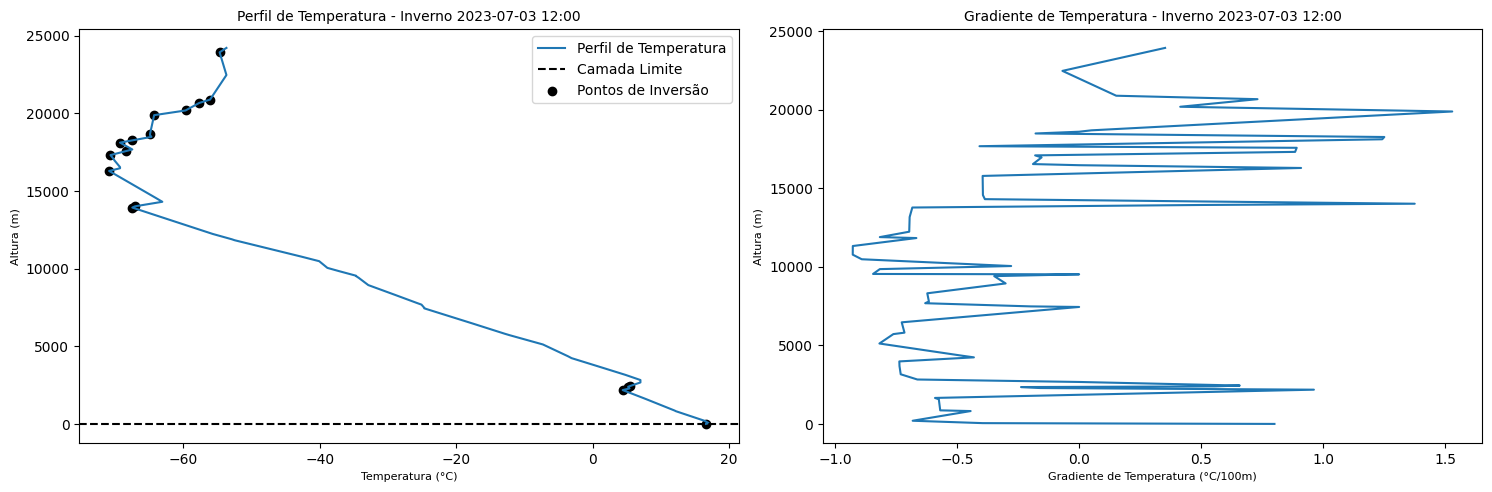

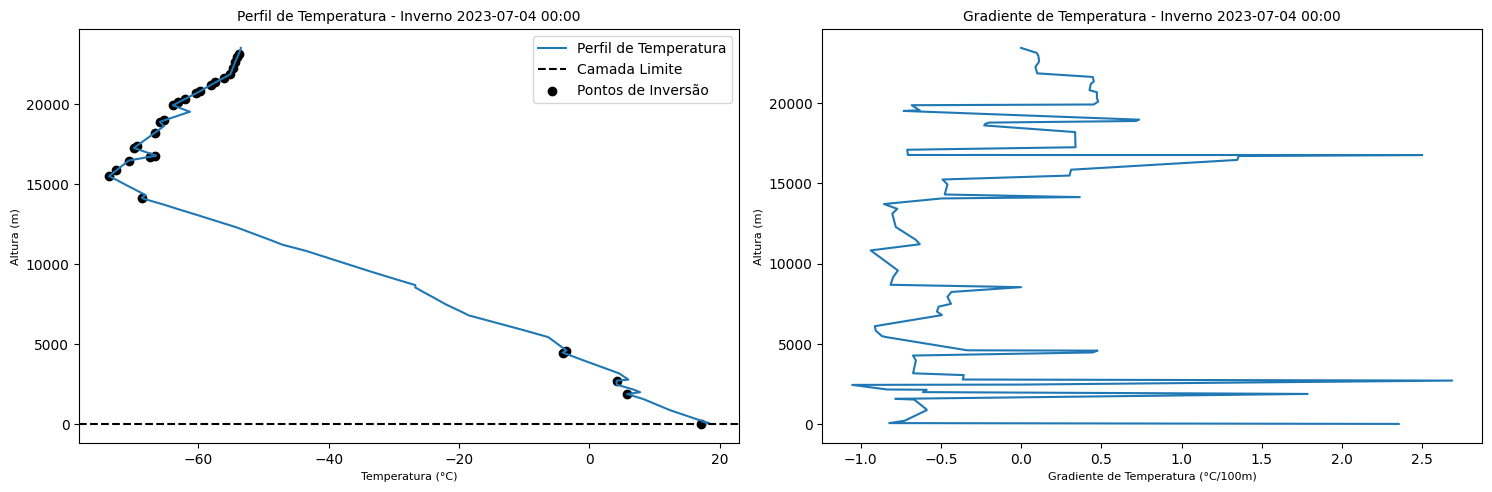

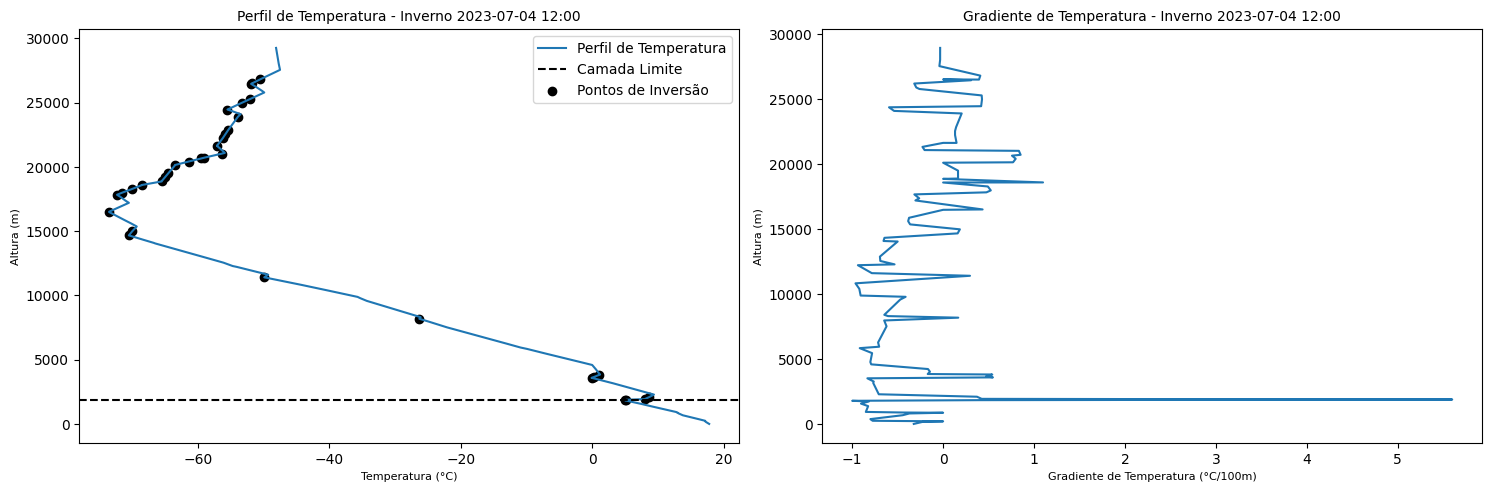

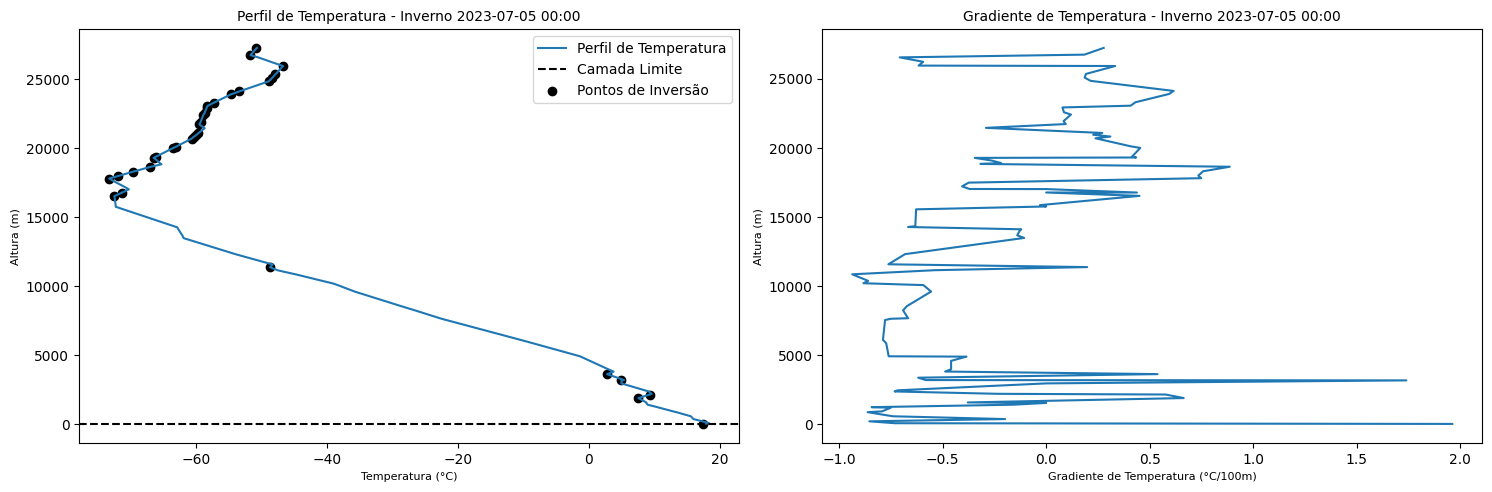

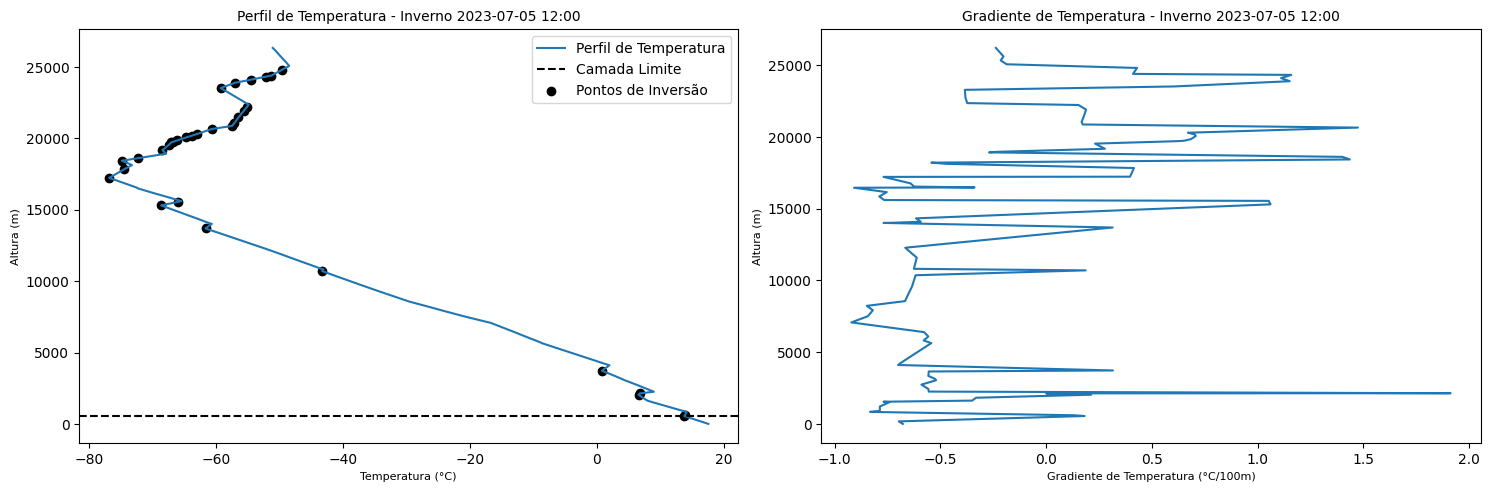

Resultados da Camada Limite em cada data:
    Estação                Data  Altura (m)  Temperatura (°C)
0     Verão 2023-01-01 00:00:00      1107.0              18.2
1     Verão 2023-01-01 12:00:00      1371.0              15.6
2     Verão 2023-01-02 00:00:00      1789.0              13.2
3     Verão 2023-01-02 12:00:00      1515.0              15.0
4     Verão 2023-01-03 00:00:00      1340.0              18.4
5     Verão 2023-01-03 12:00:00       734.0              21.4
6     Verão 2023-01-04 00:00:00      1081.0              15.8
7     Verão 2023-01-04 12:00:00     14491.0             -69.3
8     Verão 2023-01-05 00:00:00      3580.0               2.2
9     Verão 2023-01-05 12:00:00      2807.0               3.8
10  Inverno 2023-07-01 00:00:00       860.0              15.4
11  Inverno 2023-07-01 12:00:00         5.0              15.8
12  Inverno 2023-07-02 00:00:00         5.0              18.0
13  Inverno 2023-07-02 12:00:00         5.0              15.4
14  Inverno 2023-07-03 00:00

In [26]:
#Vamos análisar o comportamento da temperatura e do gradiente conforme o ano de 2023 com 5 dias no inverno e 5 dias no verão; 
#O código irá retornar para nós todos os pontos de inversão do dia plotado;

from datetime import datetime
from siphon.simplewebservice.wyoming import WyomingUpperAir
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Função para calcular gradiente de temperatura
def calcular_gradiente(temperatura, height):
    deltaT = np.diff(temperatura)
    deltaZ = np.diff(height)
    gradiente = (deltaT / deltaZ) * 100  # Gradiente por 100 metros
    return gradiente

# Função para plotar dados de temperatura e gradiente
def plotar_dados(df, date, season, ax1, ax2):
    # Plotando perfil de temperatura
    ax1.plot(df['temperature'], df['height'], label='Perfil de Temperatura')
    ax1.set_title(f'Perfil de Temperatura - {season} {date.strftime("%Y-%m-%d %H:%M")}', fontsize=10)
    ax1.set_xlabel('Temperatura (°C)', fontsize=8)
    ax1.set_ylabel('Altura (m)', fontsize=8)

    # Calcular gradiente de temperatura
    gradiente = calcular_gradiente(df['temperature'], df['height'])

    ax2.plot(gradiente, df['height'][:-1], label='Gradiente de Temperatura')
    ax2.set_title(f'Gradiente de Temperatura - {season} {date.strftime("%Y-%m-%d %H:%M")}', fontsize=10)
    ax2.set_xlabel('Gradiente de Temperatura (°C/100m)', fontsize=8)
    ax2.set_ylabel('Altura (m)', fontsize=8)

    # Identificar pontos de inversão e camada limite
    inversao = gradiente[gradiente > 0]
    altura_inversao = df['height'][:-1][gradiente > 0]
    temperatura_inversao = df['temperature'][:-1][gradiente > 0]

    if len(altura_inversao) > 0:
        altura_camada_limite = altura_inversao.iloc[0]
        temperatura_camada_limite = df['temperature'][df['height'] == altura_camada_limite].values[0]
        ax1.axhline(y=altura_camada_limite, color='black', linestyle='--', label='Camada Limite')
        ax1.scatter(temperatura_inversao, altura_inversao, color='black', label='Pontos de Inversão')
        ax1.legend()

        return altura_camada_limite, temperatura_camada_limite
    return None, None

# Datas para análise (5 dias no verão e 5 dias no inverno)
datas_verao = [datetime(2023, 1, 1, 0), datetime(2023, 1, 1, 12), datetime(2023, 1, 2, 0), datetime(2023, 1, 2, 12), datetime(2023, 1, 3, 0), datetime(2023, 1, 3, 12), datetime(2023, 1, 4, 0), datetime(2023, 1, 4, 12), datetime(2023, 1, 5, 0), datetime(2023, 1, 5, 12)]
datas_inverno = [datetime(2023, 7, 1, 0), datetime(2023, 7, 1, 12), datetime(2023, 7, 2, 0), datetime(2023, 7, 2, 12), datetime(2023, 7, 3, 0), datetime(2023, 7, 3, 12), datetime(2023, 7, 4, 0), datetime(2023, 7, 4, 12), datetime(2023, 7, 5, 0), datetime(2023, 7, 5, 12)]

station = 'SBFL'

# Lista para armazenar os resultados da camada limite
camadas_limite = []

# Processar dados para cada data e temporada
for datas, season in zip([datas_verao, datas_inverno], ['Verão', 'Inverno']):
    for date in datas:
        # Extraindo os dados
        df = WyomingUpperAir.request_data(date, station)

        if df.empty:
            print(f"Dados não encontrados para a data {date}")
            continue

        # Plotar dados
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
        altura_camada_limite, temperatura_camada_limite = plotar_dados(df, date, season, axes[0], axes[1])
        plt.tight_layout(pad=1.0)
        plt.show()

        if altura_camada_limite is not None:
            camadas_limite.append({
                'Data': date,
                'Estação': season,
                'Altura (m)': altura_camada_limite,
                'Temperatura (°C)': round(temperatura_camada_limite, 1)
            })

# Criar DataFrame com os resultados das camadas limite
df_camadas_limite = pd.DataFrame(camadas_limite)

# Reorganizar as colunas para melhor legibilidade
df_camadas_limite = df_camadas_limite[['Estação', 'Data', 'Altura (m)', 'Temperatura (°C)']]

# Exibir a tabela com os resultados
print("Resultados da Camada Limite em cada data:")
print(df_camadas_limite)

*Análise para os gradientes de temperatura plotados anteriormente

Camada limite é onde ocorrem a maioria dos processos de troca de calor, umidade e momentum entre a superfície e a atmosfera. 
A camada limite atmosférica é uma região crítica da atmosfera que influencia diretamente a dispersão e a concentração de poluentes. 
Essa camada é crucial para a dispersão de poluentes atmosféricos.

Altura da Camada Limite no Verão e Inverno:
- No verão, espera-se que a camada limite seja mais alta devido ao aquecimento mais intenso da superfície, que provoca maior convecção.
- No inverno, a camada limite tende a ser mais baixa devido à menor radiação solar e maior estabilidade atmosférica.

Padrões Diurnos:
 - A altura da camada limite geralmente aumenta durante o dia devido ao aquecimento solar e diminui à noite devido ao resfriamento da superfície. Isso pode ser verificado comparando os dados das 00:00 e 12:00 UTC.
Influência Meteorológica:

Influência Meterológica:
 - Sistemas meteorológicos como frentes frias, ciclones e anticiclones podem influenciar a altura da camada limite. No inverno, a presença de anticiclones pode aumentar a estabilidade, enquanto no verão, sistemas convectivos podem aumentar a altura da camada limite.


# Análise de dados no espaço
Nesta parte analisaremos os dados de temperatura em uma região utilizando previsão meteorológica

3 - Execute o EZ-AERMET e  avalie a altura da camada limite e turbulência em 2023. Use os dados de superfície e sondagem para executar o software. Faça figuras e analise as condições meteorológicas e sua potencial influência na qualidade do ar.  Analise também a superficie do local de estudo utilizando o output da plataforma EZ-AERMET. Verifique os valores de albedo, razão de Bowen e rugosidade para cada quadrante do vento. Faça uma figura com o recorte feito pela plataforma, utilizando uma imagem de fundo de um satélite.

In [27]:
import os
import pandas as pd

# Pegando o caminho do diretório atual
rootPath = os.getcwd()

# Definindo o diretório com os arquivos CSV
csv_directory = os.path.join(rootPath, 'inputs2')

# Listando os arquivos dentro do diretório
files = os.listdir(csv_directory)

# Abrindo e concatenando os arquivos CSV em um DataFrame
dfs = []
for file in files:
    file_path = os.path.join(csv_directory, file)
    try:
        df = pd.read_csv(file_path, encoding='latin1')
        dfs.append(df)
    except Exception as e:
        print(f"Erro ao ler o arquivo {file}: {e}")

# Concatenando todos os DataFrames em um único DataFrame
if dfs:
    metSuperficie = pd.concat(dfs, ignore_index=True)
    print(metSuperficie)
    print(type(metSuperficie))

      year  month  day  dia juliano  hour    FCS    VFS  EVC  grad_temp  \
0       23      1    1            1     1  -47.7  0.546 -9.0       -9.0   
1       23      1    1            1     2  -45.5  0.520 -9.0       -9.0   
2       23      1    1            1     3  -52.0  0.594 -9.0       -9.0   
3       23      1    1            1     4  -58.4  0.668 -9.0       -9.0   
4       23      1    1            1     5  -23.8  0.272 -9.0       -9.0   
...    ...    ...  ...          ...   ...    ...    ...  ...        ...   
8779    24      1    1            1    20 -999.0 -9.000 -9.0       -9.0   
8780    24      1    1            1    21 -999.0 -9.000 -9.0       -9.0   
8781    24      1    1            1    22 -999.0 -9.000 -9.0       -9.0   
8782    24      1    1            1    23 -999.0 -9.000 -9.0       -9.0   
8783    24      1    1            1    24 -999.0 -9.000 -9.0       -9.0   

      altura de mistura impulsionada por conveccao  boundary  obukhov  \
0                         

A média de Obukhov é: -54.91


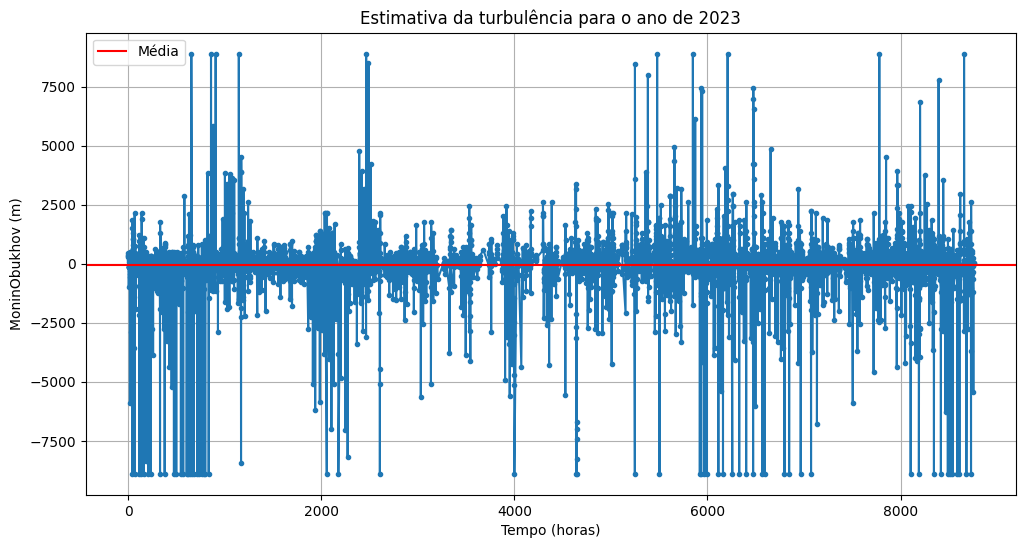

In [28]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Pegando o caminho do diretório atual
rootPath = os.getcwd()

# Definindo o diretório com os arquivos CSV
csv_directory = os.path.join(rootPath, 'inputs2')

# Listando os arquivos dentro do diretório
files = os.listdir(csv_directory)

# Abrindo e concatenando os arquivos CSV em um DataFrame
dfs = []
for file in files:
    file_path = os.path.join(csv_directory, file)
    try:
        df = pd.read_csv(file_path, encoding='latin1')
        dfs.append(df)
    except Exception as e:
        print(f"Erro ao ler o arquivo {file}: {e}")

# Concatenando todos os DataFrames em um único DataFrame
if dfs:
    metSuperficie = pd.concat(dfs, ignore_index=True)

    # Filtrar os valores -99999.0 da coluna 'obukhov'
    df_filtered = metSuperficie[metSuperficie['obukhov'] != -99999.0]

    # Calcular a média da coluna 'obukhov'
    mean_value = df_filtered['obukhov'].mean()

    # Imprimir o valor da média
    print(f'A média de Obukhov é: {mean_value:.2f}')

    # Plotar os dados filtrados
    plt.figure(figsize=(12, 6))
    plt.plot(df_filtered.index, df_filtered['obukhov'], marker='o', linestyle='-', markersize=3)
    # Adicionar a linha média em vermelho
    plt.axhline(y=mean_value, color='red', linestyle='-', label='Média')
    plt.xlabel('Tempo (horas)')
    plt.ylabel('MoninObukhov (m)')
    plt.title('Estimativa da turbulência para o ano de 2023')
    plt.grid(True)
    plt.legend()
    plt.show()

# A turbulência na atmosfera está associada a movimentos convectivos e é um fator importante na dispersão de poluentes e na formação de nuvens.
# Podemos notar que a turbulência tende a ser mais intensa durante os meses mais quentes, quando há maior aquecimento da superfície e maior instabilidade atmosférica. 
# Durante os meses mais frios, a turbulência pode ser menos intensa devido a uma atmosfera mais estável.

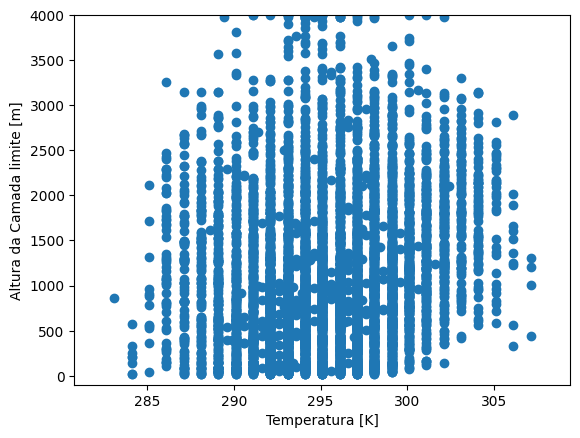

In [29]:
import matplotlib.pyplot as plt

# Escolher as duas colunas que deseja plotar
coluna1 = 'temperatura de medicao'
coluna2 = 'boundary'

# Filtrar os dados para remover outliers e ajustar a escala da temperatura
df_filtered = metSuperficie[(metSuperficie[coluna1] >= 274) & (metSuperficie[coluna1] <= 400)]

# Calcular os limites do eixo y
y_min = -100
y_max = df_filtered[coluna2].max()

# Adicionar legenda e rótulos
plt.xlabel('Temperatura [K]')
plt.ylabel('Altura da Camada limite [m]')

# Definir os limites do eixo y
plt.ylim(y_min, y_max)

# Plotar um gráfico de linhas com as duas colunas
plt.plot(df_filtered[coluna1], df_filtered[coluna2], 'o')
plt.show()

C:\Users\Win10\AppData\Local\Temp\ipykernel_20448\3566978174.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Intervalo Altura'] = (df_filtered[coluna2] // 50) * 100


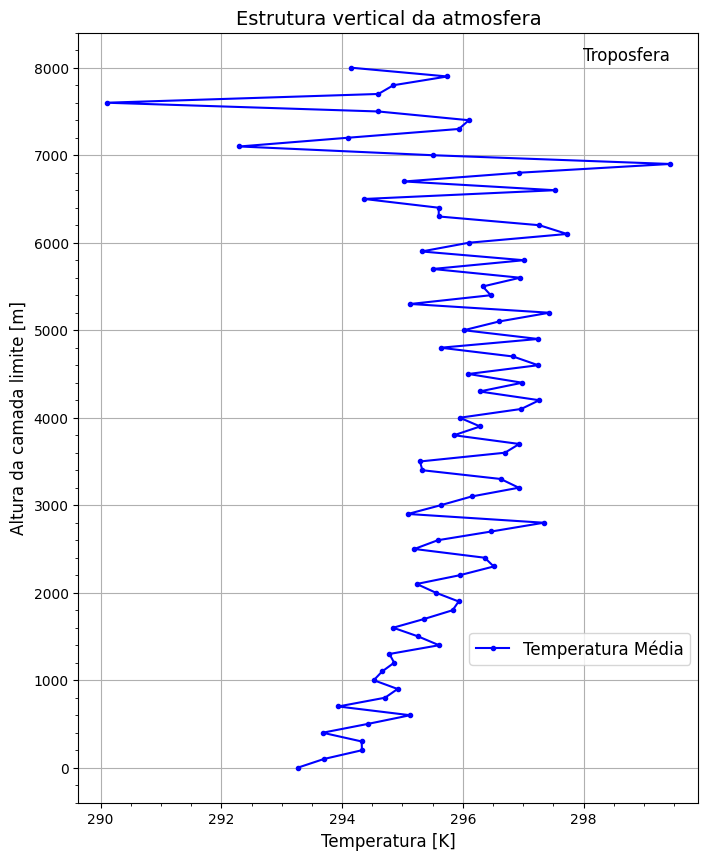

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# Escolher as duas colunas que deseja plotar
coluna1 = 'temperatura de medicao'
coluna2 = 'boundary'

# Filtrar os dados para remover valores negativos em coluna2
df_filtered = df[df[coluna2] >= 0]

# Definir intervalos de 100 metros para a altura
df_filtered['Intervalo Altura'] = (df_filtered[coluna2] // 50) * 100

# Agrupar por 'Intervalo Altura' e calcular a média da 'Temperatura'
df_mean = df_filtered.groupby('Intervalo Altura', as_index=False)[coluna1].mean()

# Configuração do gráfico
plt.figure(figsize=(8, 10))  # Ajusta o tamanho do gráfico para ser mais alto

# Plotar um gráfico de linha com a média da temperatura para cada intervalo de altura
plt.plot(df_mean[coluna1], df_mean['Intervalo Altura'], marker='o', linestyle='-', color='blue', label='Temperatura Média', markersize=3)

# Mostrar a legenda no centro
plt.legend(loc='right', bbox_to_anchor=(1, 0.2), fontsize=12)

# Adicionar a escrita "Troposfera" no canto superior direito
temperatura_max = df_mean[coluna1].max()  # Máxima temperatura para posicionamento horizontal
altura_max = df_mean['Intervalo Altura'].max()*1.03  # Máxima altura para posicionamento vertical
plt.text(temperatura_max, altura_max, 'Troposfera', fontsize=12, color='black',
         horizontalalignment='right', verticalalignment='top',)
# Adicionar legenda e rótulos
plt.xlabel('Temperatura [K]', fontsize=12)
plt.ylabel('Altura da camada limite [m]', fontsize=12)
plt.title('Estrutura vertical da atmosfera', fontsize=14)

# Adicionar grades menores
plt.minorticks_on()

# Adicionar grade para melhor visualização
plt.grid(True)

# Mostrar o gráfico
plt.show()

# Ao plotar a média da temperatura em intervalos de 100 metros, o gráfico permite identificar inversões térmicas, que são importantes para a previsão do tempo e estudos climáticos. 
# Uma inversão térmica ocorre quando a temperatura aumenta com a altitude, o que pode ser visualizado se houver mudanças na inclinação da linha de temperatura.
#As inversões térmicas indicadas no gráfico podem sugerir a presença de condições atmosféricas estáveis, que podem impactar a dispersão de poluentes e a formação de neblina. 
# Esses pontos são críticos para a previsão de qualidade do ar e segurança na aviação.

Verificando os valores de albedo, razão de Bowen e rugosidade para cada quadrante do vento.

,Unnamed: 0,z0_spring,z0_summer,z0_autumn,z0_winter,alb_spring,alb_summer,alb_autumn,alb_winter,bo_spring,bo_summer,bo_autumn,bo_winter,Sectors
0,0,0.493336,0.503764,0.483950,0.483950,0.145796,0.185666,0.177796,0.177796,0.386695,0.602253,0.820775,0.820775,90.0
1,1,0.240468,0.239355,0.164405,0.164405,0.145796,0.185666,0.177796,0.177796,0.386695,0.602253,0.820775,0.820775,135.0
2,2,0.317811,0.309474,0.218183,0.218183,0.145796,0.185666,0.177796,0.177796,0.386695,0.602253,0.820775,0.820775,180.0
3,3,0.334799,0.321946,0.235835,0.235835,0.145796,0.185666,0.177796,0.177796,0.386695,0.602253,0.820775,0.820775,225.0
4,4,0.341230,0.281828,0.176459,0.176459,0.145796,0.185666,0.177796,0.177796,0.386695,0.602253,0.820775,0.820775,270.0
5,5,0.205498,0.165187,0.074448,0.074448,0.145796,0.185666,0.177796,0.177796,0.386695,0.602253,0.820775,0.820775,315.0
6,6,0.302191,0.310203,0.262840,0.262840,0.145796,0.185666,0.177796,0.177796,0.386695,0.602253,0.820775,0.820775,45.0
7,7,0.254889,0.208255,0.118568,0.118568,0.145796,0.185666,0.177796,0.177796,0.386695,0.602253,0.820775,0.820775,0.0


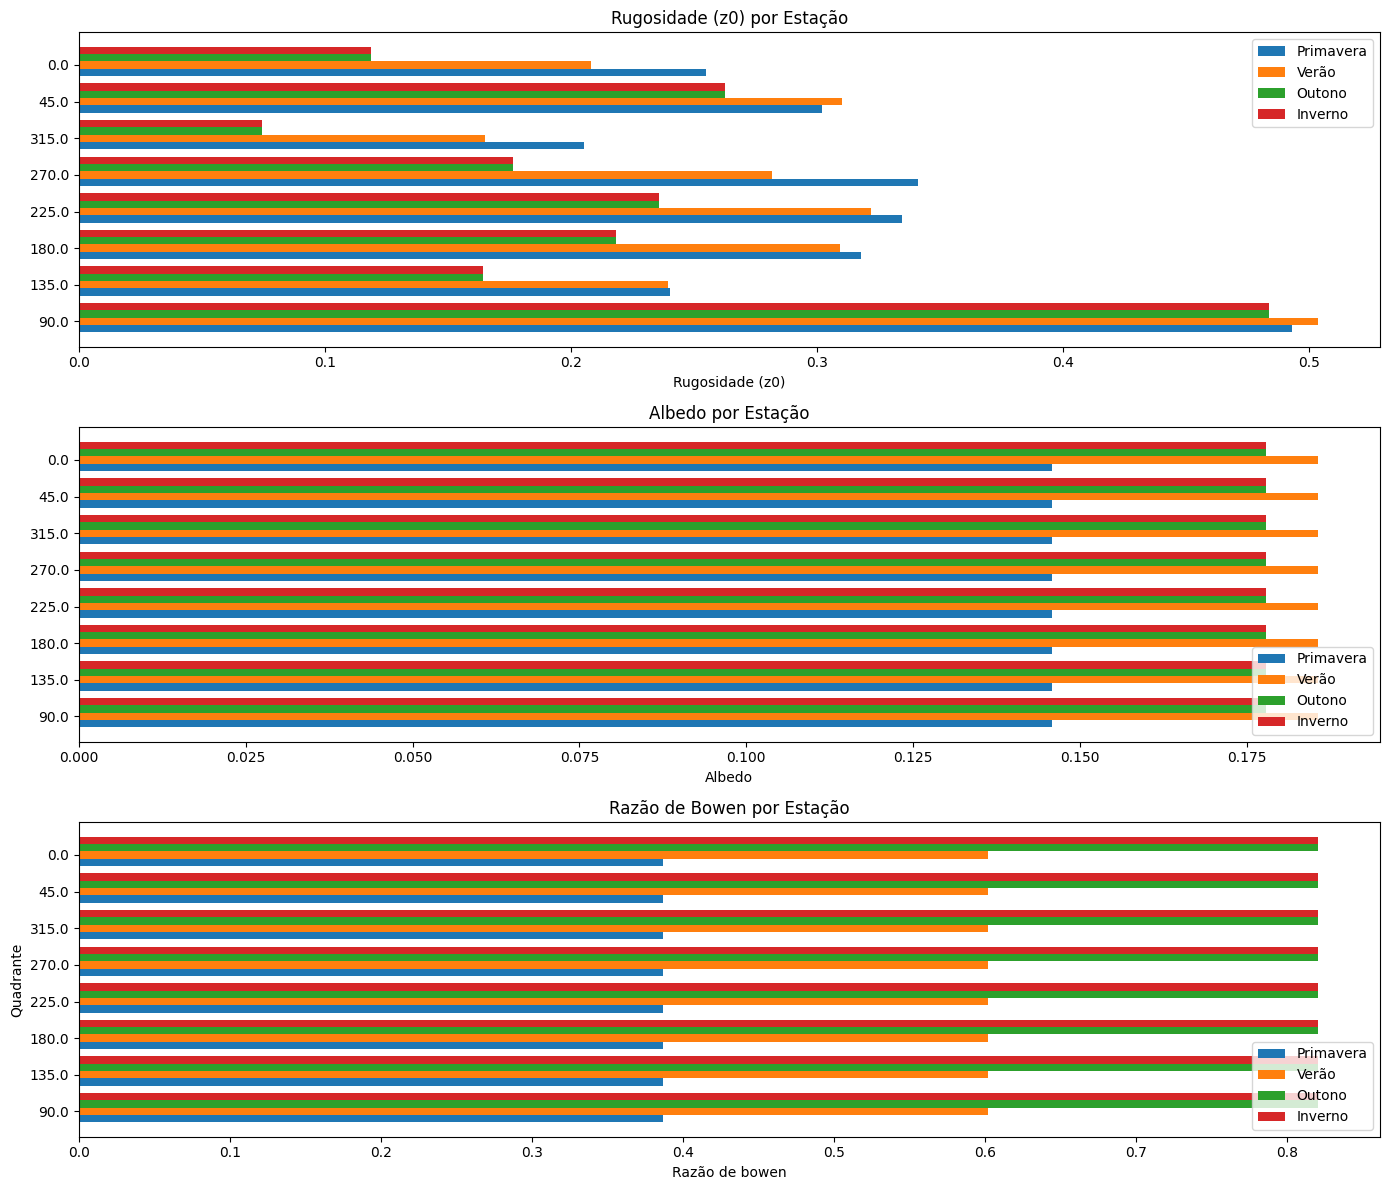

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Caminho para o arquivo CSV
caminho_arquivo = r'I:\airpolution\scripts\imputs3\landUseCharaterroserrena.csv'

# Abrir o arquivo CSV como um DataFrame do pandas, especificando o encoding
df = pd.read_csv(caminho_arquivo, encoding='latin1')

# Configurações para exibir todas as colunas
pd.set_option('display.max_columns', None)

# Exibir DataFrame
display(df)

# Plotar os gráficos
plt.figure(figsize=(14, 12))

# Plot para rugosidade (z0)
plt.subplot(3, 1, 1)
bar_width = 0.2
sectors = df['Sectors']
indices = range(len(sectors))
plt.barh([i - bar_width for i in indices], df['z0_spring'], height=bar_width, label='Primavera')
plt.barh(indices, df['z0_summer'], height=bar_width, label='Verão')
plt.barh([i + bar_width for i in indices], df['z0_autumn'], height=bar_width, label='Outono')
plt.barh([i + 2 * bar_width for i in indices], df['z0_winter'], height=bar_width, label='Inverno')
plt.yticks(indices, sectors)  # Garantir que os setores sejam exatamente os da tabela
plt.xlabel('Rugosidade (z0)')
plt.title('Rugosidade (z0) por Estação')
plt.legend()

# Plot para albedo
plt.subplot(3, 1, 2)
plt.barh([i - bar_width for i in indices], df['alb_spring'], height=bar_width, label='Primavera')
plt.barh(indices, df['alb_summer'], height=bar_width, label='Verão')
plt.barh([i + bar_width for i in indices], df['alb_autumn'], height=bar_width, label='Outono')
plt.barh([i + 2 * bar_width for i in indices], df['alb_winter'], height=bar_width, label='Inverno')
plt.yticks(indices, sectors)  # Garantir que os setores sejam exatamente os da tabela
plt.xlabel('Albedo')
plt.title('Albedo por Estação')
plt.legend()

# Plot para razão de bo
plt.subplot(3, 1, 3)
plt.barh([i - bar_width for i in indices], df['bo_spring'], height=bar_width, label='Primavera')
plt.barh(indices, df['bo_summer'], height=bar_width, label='Verão')
plt.barh([i + bar_width for i in indices], df['bo_autumn'], height=bar_width, label='Outono')
plt.barh([i + 2 * bar_width for i in indices], df['bo_winter'], height=bar_width, label='Inverno')
plt.yticks(indices, sectors)  # Garantir que os setores sejam exatamente os da tabela
plt.ylabel('Quadrante')
plt.xlabel('Razão de bowen')
plt.title('Razão de Bowen por Estação')
plt.legend()

# Ajustar layout
plt.tight_layout()
plt.show()